# Experimento 1

Link dos Datasets: https://botometer.osome.iu.edu/bot-repository/datasets.html

## Objetivos

• Encontrar métricas eficientes para avaliar se uma conta é um bot

• Avaliar o desempenho de diferentes algoritmos para os mesmos dados.
        

## Composição dos Dados de Treino/Teste

Nesse teste, utilizaremos os dados dos seguintes datasets: vendor_purchased2019, midterm2018, botometer_dataset, pronbots e genuine_accounts. 
O dataframe usado para o treino de diversos modelos de machine learning é composto de aproximadamente 80% de contas bots e 20% de contas legítimas.
Os dados que serão usados para teste seguem exatamente a mesma composição explicada anteriormente.

Relativo ao dataset de treino, ele utiliza 70% dos dados do dataset de bots, já o dataset de teste é composto por 30%.
A proporção se mantém a igual para os dados referentes as contas genuínas. 

# Escolha das features

A escolha dos dados relevantes foi feita considerando os artigos considerados no documento escrito do TCC

### Libs que serão utilizadas para a realização dos testes:

Para fazer a visualização da árvore de decisão é necessário instalar a lib graphviz para isso use o comando acima. Além disso, instale o graphviz em seu sistema operacional

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Para melhorar a visualização dos dataframes:

In [2]:
def json_to_dataset(nome_arq):
    f = open(nome_arq)
    dataset = pd.read_json(f)
    dataset = pd.json_normalize(dataset.user)
    return dataset

In [3]:
def json_to_dataset2(nome_arq):
    f = open(nome_arq)
    dataset = pd.read_json(f)
    return dataset

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
fake_followers = pd.read_csv("./datasets/fake_followers/users.csv")
fake_followers.shape

(3351, 38)

In [6]:
fake_followers['is_bot'] = 1

In [7]:
real_accounts = pd.read_csv("./datasets/genuine_accounts/users.csv")
real_accounts.shape

(3474, 42)

In [8]:
real_accounts['is_bot'] = 0

### Verified 2019

In [9]:
verified2019_dataset = ("./datasets/verified-2019_tweets.json")
verified2019_dataset = json_to_dataset(verified2019_dataset)
verified2019_dataset['dataset'] = 'Verified 2019'
verified2019_dataset.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.url.urls,entities.description.urls,dataset
0,31098240,31098240,Netwerk24,Netwerk24,Johannesburg,"Al die nuus, politiek, sport, geldsake & verma...",https://t.co/Y0QuSqwwOL,False,188419,857,432,Tue Apr 14 10:57:46 +0000 2009,628,None,None,False,True,117922,None,False,False,False,9AE4E8,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,True,http://pbs.twimg.com/profile_images/9194737572...,https://pbs.twimg.com/profile_images/919473757...,https://pbs.twimg.com/profile_banners/31098240...,0084B4,FFFFFF,DDFFCC,333333,False,False,False,False,False,False,False,none,"[{'url': 'https://t.co/Y0QuSqwwOL', 'expanded_...",[],Verified 2019
1,6892002,6892002,WBIR Channel 10,wbir,"Knoxville, TN","News, Sports, Weather & Live At Five at 4:00 -...",None,False,180759,905,1119,Mon Jun 18 13:56:24 +0000 2007,11608,None,None,True,True,176250,None,False,False,False,0F47FF,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/9025507822...,https://pbs.twimg.com/profile_images/902550782...,https://pbs.twimg.com/profile_banners/6892002/...,0000FF,87BC44,B8D8F2,080808,True,False,False,False,False,False,False,none,NaN,[],Verified 2019
2,20083388,20083388,Patricia Mazzei,PatriciaMazzei,Miami,@nytimes Miami bureau chief. Former @MiamiHera...,https://t.co/zGJ4T9rCnp,False,19311,1472,675,Wed Feb 04 19:33:39 +0000 2009,0,None,None,False,True,34918,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1913872950...,https://pbs.twimg.com/profile_images/191387295...,https://pbs.twimg.com/profile_banners/20083388...,0084B4,C0DEED,DDEEF6,333333,True,False,False,False,False,False,False,none,"[{'url': 'https://t.co/zGJ4T9rCnp', 'expanded_...",[],Verified 2019
3,385587235,385587235,Jeff Skowron,Jeffskowron,los angeles,"Actor, writer, co-creator of @greganddonny and...",https://t.co/sLdAcQfZXV,False,398,185,5,Wed Oct 05 19:21:44 +0000 2011,12798,None,None,False,True,669,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1088722409...,https://pbs.twimg.com/profile_images/108872240...,https://pbs.twimg.com/profile_banners/38558723...,1B95E0,000000,000000,000000,False,False,False,False,False,False,False,none,"[{'url': 'https://t.co/sLdAcQfZXV', 'expanded_...",[],Verified 2019
4,51240839,51240839,Heather Crawford,HeatherFCN,"Jacksonville, FL","Wife, Mom, @FCN2Go Anchor @TSIChildren Mentor,...",https://t.co/eOw8ZfXBWc,False,7125,4431,160,Fri Jun 26 21:46:52 +0000 2009,2135,None,None,True,True,16341,None,False,False,False,0099B9,http://abs.twimg.com/images/themes/theme4/bg.gif,https://abs.twimg.com/images/themes/theme4/bg.gif,False,http://pbs.twimg.com/profile_images/4587789464...,https://pbs.twimg.com/profile_images/458778946...,https://pbs.twimg.com/profile_banners/51240839...,0099B9,5ED4DC,95E8EC,3C3940,True,False,False,False,False,False,False,regular,"[{'url': 'https://t.co/eOw8ZfXBWc', 'expanded_...",[],Verified 2019


In [10]:
verified2019_dataset.shape

(1987, 44)

In [11]:
verified2019_tsv = pd.read_table('./datasets/verified-2019.tsv',header=0)
verified2019_tsv['classification'] = verified2019_tsv.classification.map({'bot': 1, 'human':0})
verified2019_tsv.head()

,user_id,classification
0,54619276,0
1,948891169,0
2,26042984,0
3,8283682,0
4,311062620,0


In [12]:
verified2019_dataset = verified2019_dataset.join(verified2019_tsv.set_index('user_id'), on='id')
verified2019_dataset.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.url.urls,entities.description.urls,dataset,classification
0,31098240,31098240,Netwerk24,Netwerk24,Johannesburg,"Al die nuus, politiek, sport, geldsake & verma...",https://t.co/Y0QuSqwwOL,False,188419,857,432,Tue Apr 14 10:57:46 +0000 2009,628,None,None,False,True,117922,None,False,False,False,9AE4E8,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,True,http://pbs.twimg.com/profile_images/9194737572...,https://pbs.twimg.com/profile_images/919473757...,https://pbs.twimg.com/profile_banners/31098240...,0084B4,FFFFFF,DDFFCC,333333,False,False,False,False,False,False,False,none,"[{'url': 'https://t.co/Y0QuSqwwOL', 'expanded_...",[],Verified 2019,0
1,6892002,6892002,WBIR Channel 10,wbir,"Knoxville, TN","News, Sports, Weather & Live At Five at 4:00 -...",None,False,180759,905,1119,Mon Jun 18 13:56:24 +0000 2007,11608,None,None,True,True,176250,None,False,False,False,0F47FF,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/9025507822...,https://pbs.twimg.com/profile_images/902550782...,https://pbs.twimg.com/profile_banners/6892002/...,0000FF,87BC44,B8D8F2,080808,True,False,False,False,False,False,False,none,NaN,[],Verified 2019,0
2,20083388,20083388,Patricia Mazzei,PatriciaMazzei,Miami,@nytimes Miami bureau chief. Former @MiamiHera...,https://t.co/zGJ4T9rCnp,False,19311,1472,675,Wed Feb 04 19:33:39 +0000 2009,0,None,None,False,True,34918,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1913872950...,https://pbs.twimg.com/profile_images/191387295...,https://pbs.twimg.com/profile_banners/20083388...,0084B4,C0DEED,DDEEF6,333333,True,False,False,False,False,False,False,none,"[{'url': 'https://t.co/zGJ4T9rCnp', 'expanded_...",[],Verified 2019,0
3,385587235,385587235,Jeff Skowron,Jeffskowron,los angeles,"Actor, writer, co-creator of @greganddonny and...",https://t.co/sLdAcQfZXV,False,398,185,5,Wed Oct 05 19:21:44 +0000 2011,12798,None,None,False,True,669,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1088722409...,https://pbs.twimg.com/profile_images/108872240...,https://pbs.twimg.com/profile_banners/38558723...,1B95E0,000000,000000,000000,False,False,False,False,False,False,False,none,"[{'url': 'https://t.co/sLdAcQfZXV', 'expanded_...",[],Verified 2019,0
4,51240839,51240839,Heather Crawford,HeatherFCN,"Jacksonville, FL","Wife, Mom, @FCN2Go Anchor @TSIChildren Mentor,...",https://t.co/eOw8ZfXBWc,False,7125,4431,160,Fri Jun 26 21:46:52 +0000 2009,2135,None,None,True,True,16341,None,False,False,False,0099B9,http://abs.twimg.com/images/themes/theme4/bg.gif,https://abs.twimg.com/images/themes/theme4/bg.gif,False,http://pbs.twimg.com/profile_images/4587789464...,https://pbs.twimg.com/profile_images/458778946...,https://pbs.twimg.com/profile_banners/51240839...,0099B9,5ED4DC,95E8EC,3C3940,True,False,False,False,False,False,False,regular,"[{'url': 'https://t.co/eOw8ZfXBWc', 'expanded_...",[],Verified 2019,0


### Cresci Stock 

In [13]:
cresci_stock_dataset = ("./datasets/cresci-stock-2018_tweets.json")
cresci_stock_dataset = json_to_dataset(cresci_stock_dataset)
cresci_stock_dataset['dataset'] = 'Cresci Stock'
cresci_stock_dataset.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.description.urls,profile_banner_url,entities.url.urls,dataset
0,270861589,270861589,Pat Miller,millerkills,Midwest,"working, running, fishing, music",None,False,6,12,0,Wed Mar 23 11:40:17 +0000 2011,2148,None,None,False,False,2962,en,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1738216258...,https://pbs.twimg.com/profile_images/173821625...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,[],NaN,NaN,Cresci Stock
1,1831466064,1831466064,Gwen C. Persichetti,gwenpersichetti,Atlanta Georgia,"Catholic, Mom, Wife, Born NY Live ATL ❤ Flower...",None,False,1716,2466,2,Sun Sep 08 16:37:46 +0000 2013,16843,None,None,False,False,7993,en,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/3788000004...,https://pbs.twimg.com/profile_images/378800000...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,[],NaN,NaN,Cresci Stock
2,1506843600,1506843600,versace,5KSOSS,,ooOooOohhh she thinks I’m cute she wanna have sex,None,False,2010,684,24,Tue Jun 11 21:19:21 +0000 2013,9880,None,None,True,False,64568,fr,False,False,False,FCFCFC,http://abs.twimg.com/images/themes/theme7/bg.gif,https://abs.twimg.com/images/themes/theme7/bg.gif,False,http://pbs.twimg.com/profile_images/1127632012...,https://pbs.twimg.com/profile_images/112763201...,8897BF,000000,F3F3F3,333333,True,True,False,False,False,False,False,regular,[],https://pbs.twimg.com/profile_banners/15068436...,NaN,Cresci Stock
3,621780088,621780088,SamaR Galil,SamaRGalil,EgypT,,None,False,220,0,1,Fri Jun 29 10:23:14 +0000 2012,2419,None,None,True,False,3919,en,False,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,http://pbs.twimg.com/profile_images/6225660353...,https://pbs.twimg.com/profile_images/622566035...,009999,EEEEEE,EFEFEF,333333,True,False,False,False,False,False,False,none,[],NaN,NaN,Cresci Stock
4,703798067586338816,703798067586338816,Pixey9,PattyRodman1,"Florida, USA","Love People, Love Christ, Love my Pomeranian.",None,False,404,313,27,Sun Feb 28 04:25:10 +0000 2016,31688,None,None,True,False,24867,en,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/7039177604...,https://pbs.twimg.com/profile_images/703917760...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none,[],NaN,NaN,Cresci Stock


In [14]:
cresci_stock_dataset.shape

(13276, 44)

In [15]:
cresci_stock_tsv = pd.read_table('./datasets/cresci-stock-2018.tsv',header=0)
cresci_stock_tsv['classification'] = cresci_stock_tsv.classification.map({'bot': 1, 'human':0})
cresci_stock_tsv.head()

,user_id,classification
0,2391736411,0
1,755095269730095104,0
2,121158213,0
3,39394073,0
4,121370906,0


In [16]:
cresci_stock_dataset = cresci_stock_dataset.join(cresci_stock_tsv.set_index('user_id'), on='id')
cresci_stock_dataset.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.description.urls,profile_banner_url,entities.url.urls,dataset,classification
0,270861589,270861589,Pat Miller,millerkills,Midwest,"working, running, fishing, music",None,False,6,12,0,Wed Mar 23 11:40:17 +0000 2011,2148,None,None,False,False,2962,en,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1738216258...,https://pbs.twimg.com/profile_images/173821625...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,[],NaN,NaN,Cresci Stock,1
1,1831466064,1831466064,Gwen C. Persichetti,gwenpersichetti,Atlanta Georgia,"Catholic, Mom, Wife, Born NY Live ATL ❤ Flower...",None,False,1716,2466,2,Sun Sep 08 16:37:46 +0000 2013,16843,None,None,False,False,7993,en,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/3788000004...,https://pbs.twimg.com/profile_images/378800000...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,[],NaN,NaN,Cresci Stock,0
2,1506843600,1506843600,versace,5KSOSS,,ooOooOohhh she thinks I’m cute she wanna have sex,None,False,2010,684,24,Tue Jun 11 21:19:21 +0000 2013,9880,None,None,True,False,64568,fr,False,False,False,FCFCFC,http://abs.twimg.com/images/themes/theme7/bg.gif,https://abs.twimg.com/images/themes/theme7/bg.gif,False,http://pbs.twimg.com/profile_images/1127632012...,https://pbs.twimg.com/profile_images/112763201...,8897BF,000000,F3F3F3,333333,True,True,False,False,False,False,False,regular,[],https://pbs.twimg.com/profile_banners/15068436...,NaN,Cresci Stock,0
3,621780088,621780088,SamaR Galil,SamaRGalil,EgypT,,None,False,220,0,1,Fri Jun 29 10:23:14 +0000 2012,2419,None,None,True,False,3919,en,False,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,http://pbs.twimg.com/profile_images/6225660353...,https://pbs.twimg.com/profile_images/622566035...,009999,EEEEEE,EFEFEF,333333,True,False,False,False,False,False,False,none,[],NaN,NaN,Cresci Stock,1
4,703798067586338816,703798067586338816,Pixey9,PattyRodman1,"Florida, USA","Love People, Love Christ, Love my Pomeranian.",None,False,404,313,27,Sun Feb 28 04:25:10 +0000 2016,31688,None,None,True,False,24867,en,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/7039177604...,https://pbs.twimg.com/profile_images/703917760...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none,[],NaN,NaN,Cresci Stock,0


### Botwiki

In [17]:
botwiki_dataset ="./datasets/botwiki-2019_tweets.json"
botwiki_dataset = json_to_dataset(botwiki_dataset)
botwiki_dataset['dataset'] = 'Bot Wiki'
botwiki_dataset.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.url.urls,entities.description.urls,dataset
0,969398693249126400,969398693249126400,Random Goth Lyric Generator,goth_lyrics,City of Dis,Esoteric dark verse from aeons before twitter ...,https://t.co/s9UkVMDACm,False,23,8,1,Fri Mar 02 02:27:13 +0000 2018,2,None,None,False,False,3792,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/9694005168...,https://pbs.twimg.com/profile_images/969400516...,https://pbs.twimg.com/profile_banners/96939869...,000000,000000,000000,000000,False,True,False,False,False,False,False,none,"[{'url': 'https://t.co/s9UkVMDACm', 'expanded_...",[],Bot Wiki
1,2402022649,2402022649,Transiting Now,transitingnow,Earth,Demonstrating the vast number of transiting ex...,https://t.co/L8ARV5JWBz,False,322,8,21,Fri Mar 21 19:10:39 +0000 2014,34,None,None,False,False,407226,None,False,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,http://pbs.twimg.com/profile_images/4548465757...,https://pbs.twimg.com/profile_images/454846575...,https://pbs.twimg.com/profile_banners/24020226...,009999,EEEEEE,EFEFEF,333333,True,False,False,False,False,False,False,none,"[{'url': 'https://t.co/L8ARV5JWBz', 'expanded_...",[],Bot Wiki
2,2976541239,2976541239,TheRiddlerBot,TheRiddlerBot,"Coimbra, Portugal",Solve the riddle by replying only the name of ...,https://t.co/1v8BON9QpT,False,171,86,32,Tue Jan 13 15:10:45 +0000 2015,1933,None,None,False,False,15668,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/5553894937...,https://pbs.twimg.com/profile_images/555389493...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,"[{'url': 'https://t.co/1v8BON9QpT', 'expanded_...",[],Bot Wiki
3,4425828741,4425828741,🌊🌊🌊🌊🌊🌊🌊🌊🌊,tiny_seas,sui.sexy,✨🌊 by @suisea ✨ donate: https://t.co/MS5qM3a8B...,https://t.co/Q6hC8oOXfQ,False,3374,9,146,Wed Dec 09 11:01:43 +0000 2015,15,None,None,False,False,5087,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/6745462138...,https://pbs.twimg.com/profile_images/674546213...,https://pbs.twimg.com/profile_banners/44258287...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,"[{'url': 'https://t.co/Q6hC8oOXfQ', 'expanded_...","[{'url': 'https://t.co/MS5qM3a8Bl', 'expanded_...",Bot Wiki
4,817082622824169472,817082622824169472,Wordfindatron,wordfindatron,The Grid,I make little word-find puzzles. Bot by @joshl...,https://t.co/Dn62jWBqAe,False,7,2,4,Thu Jan 05 18:57:32 +0000 2017,1,None,None,False,False,2813,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/8265228651...,https://pbs.twimg.com/profile_images/826522865...,NaN,19CF86,000000,000000,000000,False,False,False,False,False,False,False,none,"[{'url': 'https://t.co/Dn62jWBqAe', 'expanded_...",[],Bot Wiki


In [18]:
botwiki_tsv = pd.read_table('./datasets/botwiki-2019.tsv',header=0)
botwiki_tsv['classification'] = botwiki_tsv.classification.map({'bot': 1})
botwiki_tsv.head()

,user_id,classification
0,1120973992754581509,1
1,999622983424598016,1
2,1118951206448181248,1
3,1114680860983214081,1
4,1028578680187052032,1


In [19]:
botwiki_dataset = botwiki_dataset.join(botwiki_tsv.set_index('user_id'), on='id')
botwiki_dataset.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.url.urls,entities.description.urls,dataset,classification
0,969398693249126400,969398693249126400,Random Goth Lyric Generator,goth_lyrics,City of Dis,Esoteric dark verse from aeons before twitter ...,https://t.co/s9UkVMDACm,False,23,8,1,Fri Mar 02 02:27:13 +0000 2018,2,None,None,False,False,3792,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/9694005168...,https://pbs.twimg.com/profile_images/969400516...,https://pbs.twimg.com/profile_banners/96939869...,000000,000000,000000,000000,False,True,False,False,False,False,False,none,"[{'url': 'https://t.co/s9UkVMDACm', 'expanded_...",[],Bot Wiki,1
1,2402022649,2402022649,Transiting Now,transitingnow,Earth,Demonstrating the vast number of transiting ex...,https://t.co/L8ARV5JWBz,False,322,8,21,Fri Mar 21 19:10:39 +0000 2014,34,None,None,False,False,407226,None,False,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,http://pbs.twimg.com/profile_images/4548465757...,https://pbs.twimg.com/profile_images/454846575...,https://pbs.twimg.com/profile_banners/24020226...,009999,EEEEEE,EFEFEF,333333,True,False,False,False,False,False,False,none,"[{'url': 'https://t.co/L8ARV5JWBz', 'expanded_...",[],Bot Wiki,1
2,2976541239,2976541239,TheRiddlerBot,TheRiddlerBot,"Coimbra, Portugal",Solve the riddle by replying only the name of ...,https://t.co/1v8BON9QpT,False,171,86,32,Tue Jan 13 15:10:45 +0000 2015,1933,None,None,False,False,15668,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/5553894937...,https://pbs.twimg.com/profile_images/555389493...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,"[{'url': 'https://t.co/1v8BON9QpT', 'expanded_...",[],Bot Wiki,1
3,4425828741,4425828741,🌊🌊🌊🌊🌊🌊🌊🌊🌊,tiny_seas,sui.sexy,✨🌊 by @suisea ✨ donate: https://t.co/MS5qM3a8B...,https://t.co/Q6hC8oOXfQ,False,3374,9,146,Wed Dec 09 11:01:43 +0000 2015,15,None,None,False,False,5087,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/6745462138...,https://pbs.twimg.com/profile_images/674546213...,https://pbs.twimg.com/profile_banners/44258287...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,"[{'url': 'https://t.co/Q6hC8oOXfQ', 'expanded_...","[{'url': 'https://t.co/MS5qM3a8Bl', 'expanded_...",Bot Wiki,1
4,817082622824169472,817082622824169472,Wordfindatron,wordfindatron,The Grid,I make little word-find puzzles. Bot by @joshl...,https://t.co/Dn62jWBqAe,False,7,2,4,Thu Jan 05 18:57:32 +0000 2017,1,None,None,False,False,2813,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/8265228651...,https://pbs.twimg.com/profile_images/826522865...,NaN,19CF86,000000,000000,000000,False,False,False,False,False,False,False,none,"[{'url': 'https://t.co/Dn62jWBqAe', 'expanded_...",[],Bot Wiki,1


In [20]:
botwiki_dataset.describe()

,id,followers_count,friends_count,listed_count,favourites_count,statuses_count,classification
count,6.980000e+02,6.980000e+02,698.000000,698.000000,698.000000,6.980000e+02,698.0
mean,6.341253e+17,3.511867e+03,115.469914,53.388252,362.585960,2.041284e+04,1.0
std,4.193962e+17,5.130322e+04,802.647273,430.859293,5017.760445,1.125146e+05,0.0
min,1.986314e+07,0.000000e+00,0.000000,0.000000,0.000000,1.600000e+01,1.0
25%,4.441733e+09,2.200000e+01,0.000000,3.000000,0.000000,1.639750e+03,1.0
50%,8.316495e+17,8.100000e+01,1.000000,9.000000,1.000000,4.732500e+03,1.0
75%,9.396465e+17,5.275000e+02,5.000000,27.000000,8.000000,1.158125e+04,1.0
max,1.120974e+18,1.342549e+06,11762.000000,11059.000000,92588.000000,2.069158e+06,1.0


### Gilani 2017

O Dataset Gilani2017 é composto por bots e perfis verdadeiros classificados manualmente.

In [21]:
gilani2017_dataset ="./datasets/gilani-2017_tweets.json"
gilani2017_dataset = json_to_dataset(gilani2017_dataset)
gilani2017_dataset['dataset'] = 'Gilani 2017'
gilani2017_dataset.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.description.urls,entities.url.urls,dataset
0,613512037,613512037,Baseball Quotes,BaseballQuotes1,The Diamond,Quoting America's Pastime in 280 characters or...,None,False,121500,346,532,Wed Jun 20 15:07:36 +0000 2012,35894,None,None,True,False,21246,en,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/5591554026...,https://pbs.twimg.com/profile_images/559155402...,https://pbs.twimg.com/profile_banners/61351203...,3B94D9,000000,000000,000000,False,False,False,False,False,False,False,none,[],NaN,Gilani 2017
1,19263978,19263978,Cleveland Cavaliers,cavs,"The Q | Cleveland, OH",Official Twitter of the 2016 NBA Champion Clev...,https://t.co/XDJzEZarB0,False,3227215,1946,9039,Tue Jan 20 23:15:20 +0000 2009,16134,None,None,True,True,45791,en,False,False,False,000F25,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1079823292...,https://pbs.twimg.com/profile_images/107982329...,https://pbs.twimg.com/profile_banners/19263978...,91D2FA,FFFFFF,FDBC31,000000,True,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/XDJzEZarB0', 'expanded_...",Gilani 2017
2,1624329463,1624329463,‏المهاجر 1M,muohajer_12,المملكة العربية السعودية,,None,False,864968,767106,1371,Sat Jul 27 01:44:55 +0000 2013,23,None,None,True,False,875763,ar,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/6431284531...,https://pbs.twimg.com/profile_images/643128453...,https://pbs.twimg.com/profile_banners/16243294...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,[],NaN,Gilani 2017
3,550610050,550610050,BC.20,Bc20_,,R.I.P JRL21//R.I.P Monica💙 IG//b.20c #GLOHIOBOYS,None,False,951,275,9,Wed Apr 11 01:52:30 +0000 2012,22147,None,None,True,False,88862,en,False,False,False,642D8B,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1080054944...,https://pbs.twimg.com/profile_images/108005494...,https://pbs.twimg.com/profile_banners/55061005...,FF0000,C0DEED,DDEEF6,333333,False,True,False,False,False,False,False,none,[],NaN,Gilani 2017
4,149714640,149714640,mia 🧜🏾‍♀️🖤💋,_Blkahontas,"Hollywood, FL",to die for 🔮🤞🏾👸🏾,https://t.co/Y7Md3366Ky,False,1412,623,12,Sun May 30 01:32:39 +0000 2010,5582,None,None,True,False,142073,en,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,True,http://pbs.twimg.com/profile_images/1080969379...,https://pbs.twimg.com/profile_images/108096937...,https://pbs.twimg.com/profile_banners/14971464...,0084B4,FFFFFF,DDEEF6,241EBD,True,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/Y7Md3366Ky', 'expanded_...",Gilani 2017


In [22]:
gilani2017_tsv = pd.read_table('./datasets/gilani-2017.tsv',header=0, delim_whitespace=True)
gilani2017_tsv['classification'] = gilani2017_tsv.classification.map({'bot': 1, 'human':0})
gilani2017_tsv.head()

,user_id,classification
0,461277906,1
1,808280162,1
2,1575510320,1
3,2449235599,1
4,1113769100,1


In [23]:
gilani2017_dataset = gilani2017_dataset.join(gilani2017_tsv.set_index('user_id'), on='id')
gilani2017_dataset.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.description.urls,entities.url.urls,dataset,classification
0,613512037,613512037,Baseball Quotes,BaseballQuotes1,The Diamond,Quoting America's Pastime in 280 characters or...,None,False,121500,346,532,Wed Jun 20 15:07:36 +0000 2012,35894,None,None,True,False,21246,en,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/5591554026...,https://pbs.twimg.com/profile_images/559155402...,https://pbs.twimg.com/profile_banners/61351203...,3B94D9,000000,000000,000000,False,False,False,False,False,False,False,none,[],NaN,Gilani 2017,0.0
1,19263978,19263978,Cleveland Cavaliers,cavs,"The Q | Cleveland, OH",Official Twitter of the 2016 NBA Champion Clev...,https://t.co/XDJzEZarB0,False,3227215,1946,9039,Tue Jan 20 23:15:20 +0000 2009,16134,None,None,True,True,45791,en,False,False,False,000F25,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1079823292...,https://pbs.twimg.com/profile_images/107982329...,https://pbs.twimg.com/profile_banners/19263978...,91D2FA,FFFFFF,FDBC31,000000,True,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/XDJzEZarB0', 'expanded_...",Gilani 2017,0.0
2,1624329463,1624329463,‏المهاجر 1M,muohajer_12,المملكة العربية السعودية,,None,False,864968,767106,1371,Sat Jul 27 01:44:55 +0000 2013,23,None,None,True,False,875763,ar,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/6431284531...,https://pbs.twimg.com/profile_images/643128453...,https://pbs.twimg.com/profile_banners/16243294...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,[],NaN,Gilani 2017,1.0
3,550610050,550610050,BC.20,Bc20_,,R.I.P JRL21//R.I.P Monica💙 IG//b.20c #GLOHIOBOYS,None,False,951,275,9,Wed Apr 11 01:52:30 +0000 2012,22147,None,None,True,False,88862,en,False,False,False,642D8B,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1080054944...,https://pbs.twimg.com/profile_images/108005494...,https://pbs.twimg.com/profile_banners/55061005...,FF0000,C0DEED,DDEEF6,333333,False,True,False,False,False,False,False,none,[],NaN,Gilani 2017,0.0
4,149714640,149714640,mia 🧜🏾‍♀️🖤💋,_Blkahontas,"Hollywood, FL",to die for 🔮🤞🏾👸🏾,https://t.co/Y7Md3366Ky,False,1412,623,12,Sun May 30 01:32:39 +0000 2010,5582,None,None,True,False,142073,en,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,True,http://pbs.twimg.com/profile_images/1080969379...,https://pbs.twimg.com/profile_images/108096937...,https://pbs.twimg.com/profile_banners/14971464...,0084B4,FFFFFF,DDEEF6,241EBD,True,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/Y7Md3366Ky', 'expanded_...",Gilani 2017,0.0


### Vendor Purchased 2019

O Dataset vendor_purchased2019 é composto por bots de seguidores falsos que foram comprados pelo CNetS(Center for Complex Networks and Systems Research).

In [24]:
vendor_purchased2019_dataset ="./datasets/vendor-purchased-2019_tweets.json"
vendor_purchased2019_dataset = json_to_dataset(vendor_purchased2019_dataset)
vendor_purchased2019_dataset['dataset'] = 'Vendor Purchased 2019'
vendor_purchased2019_dataset.head()

,follow_request_sent,has_extended_profile,profile_use_background_image,id,profile_background_image_url_https,verified,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,is_translator,followers_count,profile_sidebar_border_color,id_str,default_profile_image,listed_count,is_translation_enabled,utc_offset,statuses_count,description,friends_count,location,profile_link_color,profile_image_url,notifications,geo_enabled,profile_background_color,profile_background_image_url,screen_name,lang,profile_background_tile,favourites_count,name,url,created_at,contributors_enabled,time_zone,protected,default_profile,following,entities.description.urls,profile_banner_url,entities.url.urls,dataset
0,False,False,True,53805021,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://abs.twimg.com/sticky/default_profile_i...,DDEEF6,False,3,C0DEED,53805021,True,0,False,28800.0,8,,359,,1DA1F2,http://abs.twimg.com/sticky/default_profile_im...,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,guowei534,en,False,10,pan,None,Sun Jul 05 01:14:40 +0000 2009,False,Beijing,False,True,False,[],NaN,NaN,Vendor Purchased 2019
1,False,False,True,66317516,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/946806849...,DDEEF6,False,76,C0DEED,66317516,False,3,False,3600.0,801,,957,,1DA1F2,http://pbs.twimg.com/profile_images/9468068494...,False,True,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,Aridego,en,False,205,Aridego,None,Mon Aug 17 09:21:25 +0000 2009,False,Paris,False,True,False,[],https://pbs.twimg.com/profile_banners/66317516...,NaN,Vendor Purchased 2019
2,False,False,True,483428005,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/180475720...,DDEEF6,False,160,C0DEED,483428005,False,1,False,-18000.0,240,#finalfantasyreference FF references + trend f...,2673,"Nibelheim, Planet",0084B4,http://pbs.twimg.com/profile_images/1804757208...,False,False,C0DEED,http://pbs.twimg.com/profile_background_images...,FinalFantasyRef,en,True,113,Kloud ѕтrιғe,None,Sun Feb 05 00:49:59 +0000 2012,False,Eastern Time (US & Canada),False,False,False,[],NaN,NaN,Vendor Purchased 2019
3,False,False,True,512754110,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/186863532...,DDEEF6,False,45,C0DEED,512754110,False,0,False,NaN,65,sherif,1073,,1DA1F2,http://pbs.twimg.com/profile_images/1868635325...,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,sherif35040661,en,False,57,شريف المنصورة,None,Sat Mar 03 03:53:35 +0000 2012,False,None,False,True,False,[],NaN,NaN,Vendor Purchased 2019
4,False,False,True,2583514062,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/480973233...,DDEEF6,False,2,C0DEED,2583514062,False,0,False,NaN,114,"Live lyfe , fuck $tress ,stay Single",734,Savannah Ga,1DA1F2,http://pbs.twimg.com/profile_images/4809732337...,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,ProphetNyce,en,False,77,Prophet Nyce,http://t.co/2oTcpHdIA4,Mon Jun 23 07:15:59 +0000 2014,False,None,False,True,False,[],https://pbs.twimg.com/profile_banners/25835140...,"[{'url': 'http://t.co/2oTcpHdIA4', 'indices': ...",Vendor Purchased 2019


In [25]:
vendor_purchased2019_tsv = pd.read_table('./datasets/vendor-purchased-2019.tsv',header=0)
vendor_purchased2019_tsv['classification'] = vendor_purchased2019_tsv.classification.map({'bot': 1, 'human':0})
vendor_purchased2019_tsv.head()

,user_id,classification
0,736629545512632320,1
1,764765673172176897,1
2,830692986459738114,1
3,872525677484007427,1
4,795374336823721988,1


In [26]:
vendor_purchased2019_dataset.describe().round(2)

,id,followers_count,listed_count,utc_offset,statuses_count,friends_count,favourites_count
count,1.088000e+03,1088.00,1088.00,457.00,1088.00,1088.00,1088.00
mean,1.383792e+17,84892.17,214.65,-10894.53,13923.48,57215.46,6085.91
std,3.166362e+17,390442.51,1047.21,19779.67,72893.79,212242.08,28539.97
min,1.069351e+06,0.00,0.00,-39600.00,1.00,0.00,0.00
25%,3.583319e+08,10.00,0.00,-28800.00,47.00,708.00,26.00
50%,9.326519e+08,58.00,0.00,-18000.00,196.50,1642.00,105.50
75%,2.773970e+09,8897.50,20.00,3600.00,2201.50,4966.25,1153.50
max,9.507135e+17,9604186.00,21931.00,39600.00,1547671.00,4249178.00,384657.00


In [27]:
vendor_purchased2019_dataset = vendor_purchased2019_dataset.join(vendor_purchased2019_tsv.set_index('user_id'), on='id')
vendor_purchased2019_dataset.head()

,follow_request_sent,has_extended_profile,profile_use_background_image,id,profile_background_image_url_https,verified,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,is_translator,followers_count,profile_sidebar_border_color,id_str,default_profile_image,listed_count,is_translation_enabled,utc_offset,statuses_count,description,friends_count,location,profile_link_color,profile_image_url,notifications,geo_enabled,profile_background_color,profile_background_image_url,screen_name,lang,profile_background_tile,favourites_count,name,url,created_at,contributors_enabled,time_zone,protected,default_profile,following,entities.description.urls,profile_banner_url,entities.url.urls,dataset,classification
0,False,False,True,53805021,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://abs.twimg.com/sticky/default_profile_i...,DDEEF6,False,3,C0DEED,53805021,True,0,False,28800.0,8,,359,,1DA1F2,http://abs.twimg.com/sticky/default_profile_im...,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,guowei534,en,False,10,pan,None,Sun Jul 05 01:14:40 +0000 2009,False,Beijing,False,True,False,[],NaN,NaN,Vendor Purchased 2019,1.0
1,False,False,True,66317516,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/946806849...,DDEEF6,False,76,C0DEED,66317516,False,3,False,3600.0,801,,957,,1DA1F2,http://pbs.twimg.com/profile_images/9468068494...,False,True,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,Aridego,en,False,205,Aridego,None,Mon Aug 17 09:21:25 +0000 2009,False,Paris,False,True,False,[],https://pbs.twimg.com/profile_banners/66317516...,NaN,Vendor Purchased 2019,1.0
2,False,False,True,483428005,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/180475720...,DDEEF6,False,160,C0DEED,483428005,False,1,False,-18000.0,240,#finalfantasyreference FF references + trend f...,2673,"Nibelheim, Planet",0084B4,http://pbs.twimg.com/profile_images/1804757208...,False,False,C0DEED,http://pbs.twimg.com/profile_background_images...,FinalFantasyRef,en,True,113,Kloud ѕтrιғe,None,Sun Feb 05 00:49:59 +0000 2012,False,Eastern Time (US & Canada),False,False,False,[],NaN,NaN,Vendor Purchased 2019,1.0
3,False,False,True,512754110,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/186863532...,DDEEF6,False,45,C0DEED,512754110,False,0,False,NaN,65,sherif,1073,,1DA1F2,http://pbs.twimg.com/profile_images/1868635325...,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,sherif35040661,en,False,57,شريف المنصورة,None,Sat Mar 03 03:53:35 +0000 2012,False,None,False,True,False,[],NaN,NaN,Vendor Purchased 2019,1.0
4,False,False,True,2583514062,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/480973233...,DDEEF6,False,2,C0DEED,2583514062,False,0,False,NaN,114,"Live lyfe , fuck $tress ,stay Single",734,Savannah Ga,1DA1F2,http://pbs.twimg.com/profile_images/4809732337...,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,ProphetNyce,en,False,77,Prophet Nyce,http://t.co/2oTcpHdIA4,Mon Jun 23 07:15:59 +0000 2014,False,None,False,True,False,[],https://pbs.twimg.com/profile_banners/25835140...,"[{'url': 'http://t.co/2oTcpHdIA4', 'indices': ...",Vendor Purchased 2019,1.0


### Midterm 2018

O dataset midterm2018 é composto parcialmente por bots e contas legítimas, a maior parte das contas bots foram banidas logo após o período eleitoral americano(Artigo: Scalable and Generalizable Social Bot Detection through Data Selection)

In [28]:
midterm2018_dataset ="./datasets/midterm-2018_processed_user_objects.json"
midterm2018_dataset = json_to_dataset2(midterm2018_dataset)
midterm2018_dataset['dataset'] = 'Midterm 2018'
midterm2018_dataset.head()

,probe_timestamp,user_id,screen_name,name,description,user_created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,dataset
0,Tue Nov 06 20:35:08 2018,4107317134,danitheduck21,Dani🏳️‍🌈,Dani 💜 She/Her 💜 Randomness all over. Expect l...,2015-11-03 21:16:13,None,en,0.0,False,False,False,False,481,870,26,6542,67025,1059907055421509632,Midterm 2018
1,Tue Nov 06 17:57:51 2018,4858296837,ncaraballoPR,Natalie Caraballo,"Things I don’t get tired of: Politics, Amy Win...",2016-01-28 20:03:51,None,en,0.0,False,False,False,False,202,712,5,1515,158,1059867472810180609,Midterm 2018
2,Tue Nov 06 20:35:23 2018,232631847,drmendezmd,Wilson,"Latin american100%! Let fight for our country,...",2010-12-31 18:55:05,None,en,0.0,False,True,True,True,278,342,4,4780,4029,1059907117094711296,Midterm 2018
3,Tue Nov 06 19:23:19 2018,16700555,ScottNevins,Scott Nevins,TV Personality & Host | Political/News Contrib...,2008-10-11 21:39:34,http://www.ScottNevins.com,en,0.0,True,False,True,False,29546,384,402,143163,53427,1059888980957650944,Midterm 2018
4,Tue Nov 06 20:35:24 2018,334443152,lild1206,D,None,2011-07-13 03:13:52,None,en,0.0,False,True,True,True,95,668,1,1178,1315,1059907122408898562,Midterm 2018


In [29]:
midterm2018_dataset.describe().round(2)

,user_id,protected,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid
count,5.053800e+04,46995.0,50538.00,50538.00,50538.00,50538.00,50538.00,5.053800e+04
mean,8.925586e+17,0.0,2646.62,291.85,15.77,2314.84,2450.86,1.057336e+18
std,3.635604e+17,0.0,232271.41,2671.67,449.02,12672.64,13770.23,6.132004e+15
min,7.461300e+04,0.0,0.00,0.00,0.00,0.00,1.00,7.960691e+17
25%,9.868172e+17,0.0,0.00,0.00,0.00,0.00,8.00,1.052275e+18
50%,1.052364e+18,0.0,1.00,9.00,0.00,0.00,30.00,1.057426e+18
75%,1.056739e+18,0.0,16.00,141.00,0.00,75.00,147.00,1.059911e+18
max,1.078964e+18,0.0,50865898.00,298234.00,67930.00,463821.00,599307.00,1.078970e+18


In [30]:
midterm2018_tsv = pd.read_table('./datasets/midterm-2018.tsv',header=0)
midterm2018_tsv['classification'] = midterm2018_tsv.classification.map({'bot': 1, 'human':0})
midterm2018_tsv.head()

,user_id,classification
0,2521260264,1
1,2521267226,1
2,2521271036,1
3,2521301466,1
4,2521307095,1


In [31]:
midterm2018_dataset = midterm2018_dataset.join(midterm2018_tsv.set_index('user_id'), on='user_id')
midterm2018_dataset.head()

,probe_timestamp,user_id,screen_name,name,description,user_created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,dataset,classification
0,Tue Nov 06 20:35:08 2018,4107317134,danitheduck21,Dani🏳️‍🌈,Dani 💜 She/Her 💜 Randomness all over. Expect l...,2015-11-03 21:16:13,None,en,0.0,False,False,False,False,481,870,26,6542,67025,1059907055421509632,Midterm 2018,0
1,Tue Nov 06 17:57:51 2018,4858296837,ncaraballoPR,Natalie Caraballo,"Things I don’t get tired of: Politics, Amy Win...",2016-01-28 20:03:51,None,en,0.0,False,False,False,False,202,712,5,1515,158,1059867472810180609,Midterm 2018,0
2,Tue Nov 06 20:35:23 2018,232631847,drmendezmd,Wilson,"Latin american100%! Let fight for our country,...",2010-12-31 18:55:05,None,en,0.0,False,True,True,True,278,342,4,4780,4029,1059907117094711296,Midterm 2018,0
3,Tue Nov 06 19:23:19 2018,16700555,ScottNevins,Scott Nevins,TV Personality & Host | Political/News Contrib...,2008-10-11 21:39:34,http://www.ScottNevins.com,en,0.0,True,False,True,False,29546,384,402,143163,53427,1059888980957650944,Midterm 2018,0
4,Tue Nov 06 20:35:24 2018,334443152,lild1206,D,None,2011-07-13 03:13:52,None,en,0.0,False,True,True,True,95,668,1,1178,1315,1059907122408898562,Midterm 2018,0


Nesse trecho do código fazemos a leitura do arquivo de usuários da base de dados de fake_followers. E em seguida mostramos a dimensão dos dados obtidos, sendo 3351 linhas(registros) e 38 colunas(features).


### Pronbots

O dataset pronbots é composto por bots que compartilham scams

In [32]:
pronbots_dataset ="./datasets/pronbots-2019_tweets.json"
pronbots_dataset = json_to_dataset(pronbots_dataset)
pronbots_dataset['dataset'] = 'Pronbots'
pronbots_dataset.head()

,follow_request_sent,has_extended_profile,profile_use_background_image,default_profile_image,id,profile_background_image_url_https,verified,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,followers_count,profile_sidebar_border_color,id_str,profile_background_color,listed_count,is_translation_enabled,utc_offset,statuses_count,description,friends_count,location,profile_link_color,profile_image_url,following,geo_enabled,profile_banner_url,profile_background_image_url,screen_name,lang,profile_background_tile,favourites_count,name,notifications,url,created_at,contributors_enabled,time_zone,protected,default_profile,is_translator,entities.description.urls,entities.url.urls,dataset
0,False,False,True,False,86166567,https://abs.twimg.com/images/themes/theme5/bg.gif,False,none,3E4415,https://pbs.twimg.com/profile_images/967640193...,99CC33,42,829D5E,86166567,352726,0,False,NaN,101,Candy girl. Dance \ Dogs lover. Come to me htt...,240,,D02B55,http://pbs.twimg.com/profile_images/9676401936...,False,False,https://pbs.twimg.com/profile_banners/86166567...,http://abs.twimg.com/images/themes/theme5/bg.gif,greenhomunculus,en,False,515,Kathy Carrington,False,None,Thu Oct 29 21:29:14 +0000 2009,False,None,False,False,False,"[{'url': 'https://t.co/FmXiY0uJlh', 'indices':...",NaN,Pronbots
1,False,False,True,False,108704199,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971197066...,DDEEF6,16,C0DEED,108704199,C0DEED,0,False,NaN,38,I want you... 💫💫💫 https://t.co/QiaP74jkJv,0,,1DA1F2,http://pbs.twimg.com/profile_images/9711970664...,False,False,https://pbs.twimg.com/profile_banners/10870419...,http://abs.twimg.com/images/themes/theme1/bg.png,seizastar,en,False,187,Juliet Bush,False,None,Tue Jan 26 20:12:22 +0000 2010,False,None,False,True,False,"[{'url': 'https://t.co/QiaP74jkJv', 'indices':...",NaN,Pronbots
2,False,False,True,False,2165940152,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971723310...,DDEEF6,7,C0DEED,2165940152,C0DEED,0,False,NaN,32,Cute lady. Costume designer \ MARVEL fan. Come...,0,,1DA1F2,http://pbs.twimg.com/profile_images/9717233104...,False,False,https://pbs.twimg.com/profile_banners/21659401...,http://abs.twimg.com/images/themes/theme1/bg.png,chechelala9876,en,False,178,Louise Creighton,False,None,Thu Oct 31 03:48:18 +0000 2013,False,None,False,True,False,"[{'url': 'https://t.co/oya8l8noLh', 'indices':...",NaN,Pronbots
3,False,False,True,False,196846880,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971647812...,DDEEF6,99,C0DEED,196846880,C0DEED,0,False,NaN,145,Cosplay master \ MARVEL fan. Come to me https:...,500,,1DA1F2,http://pbs.twimg.com/profile_images/9716478122...,False,False,https://pbs.twimg.com/profile_banners/19684688...,http://abs.twimg.com/images/themes/theme1/bg.png,MischaBruce,en,False,838,Gladys Ellington,False,None,Thu Sep 30 01:33:02 +0000 2010,False,None,False,True,False,"[{'url': 'https://t.co/PKoT4Bngwn', 'indices':...",NaN,Pronbots
4,False,False,True,False,884237364,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971628685...,DDEEF6,59,C0DEED,884237364,C0DEED,0,False,NaN,39,Blogger / Animal lover. Check out https://t.co...,419,,1DA1F2,http://pbs.twimg.com/profile_images/9716286859...,False,False,https://pbs.twimg.com/profile_banners/88423736...,http://abs.twimg.com/images/themes/theme1/bg.png,cucum87,ko,False,628,Sue Marlow,False,None,Tue Oct 16 11:24:54 +0000 2012,False,None,False,True,False,"[{'url': 'https://t.co/u5JX1noNGx', 'indices':...",NaN,Pronbots


In [33]:
pronbots_tsv = pd.read_table('./datasets/pronbots-2019.tsv',header=0)
pronbots_tsv['classification'] = pronbots_tsv.classification.map({'bot': 1, 'human':0})
pronbots_tsv.head()

,user_id,classification
0,1111770704,1
1,422386111,1
2,94059036,1
3,419403479,1
4,3141909615,1


In [34]:
pronbots_dataset.describe().round(2)

,id,followers_count,listed_count,utc_offset,statuses_count,friends_count,favourites_count
count,1.788200e+04,17882.00,17882.00,2326.00,17882.00,17882.00,17882.00
mean,6.363824e+16,34.05,0.14,-4034.91,182.33,49.04,303.89
std,2.224777e+17,49.84,1.77,20701.45,1139.53,161.01,600.39
min,6.954442e+06,0.00,0.00,-39600.00,1.00,0.00,0.00
25%,3.852462e+08,9.00,0.00,-21600.00,25.00,0.00,127.00
50%,9.686774e+08,19.00,0.00,-10800.00,43.00,0.00,204.00
75%,2.465596e+09,39.00,0.00,7200.00,83.00,0.00,359.00
max,9.714628e+17,510.00,190.00,46800.00,42639.00,4709.00,29703.00


### Botometer

O Dataset botometer é composto por contas bots e perfis genuínos verificados manualmente após a classificação do Botometer.

In [35]:
botometer_dataset ="./datasets/botometer-feedback-2019_tweets.json"
botometer_dataset = json_to_dataset(botometer_dataset)
botometer_dataset['dataset'] = 'Botometer'
botometer_dataset.head()

,follow_request_sent,has_extended_profile,profile_use_background_image,default_profile_image,id,profile_background_image_url_https,verified,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,followers_count,profile_sidebar_border_color,id_str,profile_background_color,listed_count,is_translation_enabled,utc_offset,statuses_count,description,friends_count,location,profile_link_color,profile_image_url,following,geo_enabled,profile_banner_url,profile_background_image_url,screen_name,lang,profile_background_tile,favourites_count,name,notifications,url,created_at,contributors_enabled,time_zone,protected,default_profile,is_translator,entities.url.urls,entities.description.urls,dataset
0,False,False,False,False,602249341,https://abs.twimg.com/images/themes/theme4/bg.gif,False,none,000000,https://pbs.twimg.com/profile_images/923924342...,000000,790,000000,602249341,000000,42,False,3600.0,6252,Strategic Creative Social Media & Community En...,3218,London - mostly,409FCE,http://pbs.twimg.com/profile_images/9239243429...,False,True,https://pbs.twimg.com/profile_banners/60224934...,http://abs.twimg.com/images/themes/theme4/bg.gif,EmmaDingle,en,False,12898,Emma Dingle🐧🏳️‍🌈🇪🇺🇬🇧🏴🤓,False,https://t.co/e5t6p9w7D8,Thu Jun 07 22:16:27 +0000 2012,False,London,False,False,False,"[{'url': 'https://t.co/e5t6p9w7D8', 'indices':...",[],Botometer
1,False,True,False,False,797617218511060992,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,000000,https://pbs.twimg.com/profile_images/855244571...,000000,16039,000000,797617218511060992,000000,18,False,-25200.0,14885,Injustice and corruption make me really mad. I...,10960,All over North America,000000,http://pbs.twimg.com/profile_images/8552445716...,False,False,https://pbs.twimg.com/profile_banners/79761721...,http://abs.twimg.com/images/themes/theme1/bg.png,Wolv_2018,en,False,10835,Wolverine 2018💥,False,None,Sun Nov 13 01:48:58 +0000 2016,False,Pacific Time (US & Canada),False,False,False,NaN,[],Botometer
2,False,False,True,False,889925474,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/964079832...,DDEEF6,7618,FFFFFF,889925474,015EA5,118,False,NaN,7376,Whistler REALTOR® specializing in mountain lif...,7800,"Whistler, BC CANADA",0084B4,http://pbs.twimg.com/profile_images/9640798322...,False,False,https://pbs.twimg.com/profile_banners/88992547...,http://pbs.twimg.com/profile_background_images...,RobPalmWhistler,en,False,3116,Rob Palm Whistler,False,http://t.co/7gh2Iu1AT4,Thu Oct 18 23:19:38 +0000 2012,False,None,False,False,False,"[{'url': 'http://t.co/7gh2Iu1AT4', 'indices': ...",[],Botometer
3,False,True,True,False,96435556,https://abs.twimg.com/images/themes/theme6/bg.gif,False,none,333333,https://pbs.twimg.com/profile_images/311429969...,A0C5C7,388,86A4A6,96435556,709397,6,False,7200.0,48933,O scrivi Italia o scrivi libertà. Due termini ...,674,"Roma, Lazio",FF3300,http://pbs.twimg.com/profile_images/3114299697...,False,True,https://pbs.twimg.com/profile_banners/96435556...,http://abs.twimg.com/images/themes/theme6/bg.gif,Marianocrt,it,False,1728,Mariano,False,None,Sat Dec 12 22:53:04 +0000 2009,False,Rome,False,False,False,NaN,[],Botometer
4,False,False,True,False,16905397,https://pbs.twimg.com/profile_background_image...,False,regular,666666,https://pbs.twimg.com/profile_images/969705141...,252429,19677,000000,16905397,1A1B1F,612,False,7200.0,62922,"Education, Flaneur, Digitalisation—Tweets Germ...",13611,"Frankfurt am Main, Deutschland",1B95E0,http://pbs.twimg.com/profile_images/9697051416...,False,True,https://pbs.twimg.com/profile_banners/16905397...,http://pbs.twimg.com/profile_background_images...,herrlarbig,de,False,5946,Torsten Larbig,False,https://t.co/VRgsX8eVR2,Wed Oct 22 13:43:42 +0000 2008,False,Bern,False,False,False,"[{'url': 'https://t.co/VRgsX8eVR2', 'indices':...","[{'url': 'https://t.co/3LdzrjSYSW', 'indices':...",Botometer


In [36]:
botometer_dataset.describe().round(2)

,id,followers_count,listed_count,utc_offset,statuses_count,friends_count,favourites_count
count,5.180000e+02,518.00,518.00,308.00,518.00,518.00,518.00
mean,2.640134e+17,160215.11,514.48,-13926.62,30306.31,6766.96,15806.83
std,3.904569e+17,2309820.41,4498.54,12515.41,135814.16,31858.52,48460.54
min,8.046810e+05,0.00,0.00,-36000.00,1.00,0.00,0.00
25%,1.632265e+08,110.00,0.00,-25200.00,490.75,172.00,126.75
50%,2.193905e+09,798.00,10.00,-14400.00,4650.50,690.00,2342.50
75%,7.612586e+17,5956.75,75.75,-14400.00,26041.50,3351.00,12949.75
max,9.721111e+17,50918077.00,87196.00,36000.00,2497534.00,476849.00,910116.00


In [37]:
botometer_tsv = pd.read_table('./datasets/botometer-feedback-2019.tsv',header=0)
botometer_tsv['classification'] = botometer_tsv.classification.map({'bot': 1, 'human':0})
botometer_tsv.head()

,user_id,classification
0,2718436417,0
1,792615528791703553,0
2,3287012484,0
3,93816184,0
4,754884880996020225,1


In [38]:
botometer_dataset = botometer_dataset.join(botometer_tsv.set_index('user_id'), on='id')
botometer_dataset.head()

,follow_request_sent,has_extended_profile,profile_use_background_image,default_profile_image,id,profile_background_image_url_https,verified,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,followers_count,profile_sidebar_border_color,id_str,profile_background_color,listed_count,is_translation_enabled,utc_offset,statuses_count,description,friends_count,location,profile_link_color,profile_image_url,following,geo_enabled,profile_banner_url,profile_background_image_url,screen_name,lang,profile_background_tile,favourites_count,name,notifications,url,created_at,contributors_enabled,time_zone,protected,default_profile,is_translator,entities.url.urls,entities.description.urls,dataset,classification
0,False,False,False,False,602249341,https://abs.twimg.com/images/themes/theme4/bg.gif,False,none,000000,https://pbs.twimg.com/profile_images/923924342...,000000,790,000000,602249341,000000,42,False,3600.0,6252,Strategic Creative Social Media & Community En...,3218,London - mostly,409FCE,http://pbs.twimg.com/profile_images/9239243429...,False,True,https://pbs.twimg.com/profile_banners/60224934...,http://abs.twimg.com/images/themes/theme4/bg.gif,EmmaDingle,en,False,12898,Emma Dingle🐧🏳️‍🌈🇪🇺🇬🇧🏴🤓,False,https://t.co/e5t6p9w7D8,Thu Jun 07 22:16:27 +0000 2012,False,London,False,False,False,"[{'url': 'https://t.co/e5t6p9w7D8', 'indices':...",[],Botometer,0
1,False,True,False,False,797617218511060992,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,000000,https://pbs.twimg.com/profile_images/855244571...,000000,16039,000000,797617218511060992,000000,18,False,-25200.0,14885,Injustice and corruption make me really mad. I...,10960,All over North America,000000,http://pbs.twimg.com/profile_images/8552445716...,False,False,https://pbs.twimg.com/profile_banners/79761721...,http://abs.twimg.com/images/themes/theme1/bg.png,Wolv_2018,en,False,10835,Wolverine 2018💥,False,None,Sun Nov 13 01:48:58 +0000 2016,False,Pacific Time (US & Canada),False,False,False,NaN,[],Botometer,1
2,False,False,True,False,889925474,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/964079832...,DDEEF6,7618,FFFFFF,889925474,015EA5,118,False,NaN,7376,Whistler REALTOR® specializing in mountain lif...,7800,"Whistler, BC CANADA",0084B4,http://pbs.twimg.com/profile_images/9640798322...,False,False,https://pbs.twimg.com/profile_banners/88992547...,http://pbs.twimg.com/profile_background_images...,RobPalmWhistler,en,False,3116,Rob Palm Whistler,False,http://t.co/7gh2Iu1AT4,Thu Oct 18 23:19:38 +0000 2012,False,None,False,False,False,"[{'url': 'http://t.co/7gh2Iu1AT4', 'indices': ...",[],Botometer,0
3,False,True,True,False,96435556,https://abs.twimg.com/images/themes/theme6/bg.gif,False,none,333333,https://pbs.twimg.com/profile_images/311429969...,A0C5C7,388,86A4A6,96435556,709397,6,False,7200.0,48933,O scrivi Italia o scrivi libertà. Due termini ...,674,"Roma, Lazio",FF3300,http://pbs.twimg.com/profile_images/3114299697...,False,True,https://pbs.twimg.com/profile_banners/96435556...,http://abs.twimg.com/images/themes/theme6/bg.gif,Marianocrt,it,False,1728,Mariano,False,None,Sat Dec 12 22:53:04 +0000 2009,False,Rome,False,False,False,NaN,[],Botometer,1
4,False,False,True,False,16905397,https://pbs.twimg.com/profile_background_image...,False,regular,666666,https://pbs.twimg.com/profile_images/969705141...,252429,19677,000000,16905397,1A1B1F,612,False,7200.0,62922,"Education, Flaneur, Digitalisation—Tweets Germ...",13611,"Frankfurt am Main, Deutschland",1B95E0,http://pbs.twimg.com/profile_images/9697051416...,False,True,https://pbs.twimg.com/profile_banners/16905397...,http://pbs.twimg.com/profile_background_images...,herrlarbig,de,False,5946,Torsten Larbig,False,https://t.co/VRgsX8eVR2,Wed Oct 22 13:43:42 +0000 2008,False,Bern,False,False,False,"[{'url': 'https://t.co/VRgsX8eVR2', 'indices':...","[{'url': 'https://t.co/3LdzrjSYSW', 'indices':...",Botometer,0


In [39]:
pronbots_dataset = pronbots_dataset.join(pronbots_tsv.set_index('user_id'), on='id')
pronbots_dataset.head()

,follow_request_sent,has_extended_profile,profile_use_background_image,default_profile_image,id,profile_background_image_url_https,verified,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,followers_count,profile_sidebar_border_color,id_str,profile_background_color,listed_count,is_translation_enabled,utc_offset,statuses_count,description,friends_count,location,profile_link_color,profile_image_url,following,geo_enabled,profile_banner_url,profile_background_image_url,screen_name,lang,profile_background_tile,favourites_count,name,notifications,url,created_at,contributors_enabled,time_zone,protected,default_profile,is_translator,entities.description.urls,entities.url.urls,dataset,classification
0,False,False,True,False,86166567,https://abs.twimg.com/images/themes/theme5/bg.gif,False,none,3E4415,https://pbs.twimg.com/profile_images/967640193...,99CC33,42,829D5E,86166567,352726,0,False,NaN,101,Candy girl. Dance \ Dogs lover. Come to me htt...,240,,D02B55,http://pbs.twimg.com/profile_images/9676401936...,False,False,https://pbs.twimg.com/profile_banners/86166567...,http://abs.twimg.com/images/themes/theme5/bg.gif,greenhomunculus,en,False,515,Kathy Carrington,False,None,Thu Oct 29 21:29:14 +0000 2009,False,None,False,False,False,"[{'url': 'https://t.co/FmXiY0uJlh', 'indices':...",NaN,Pronbots,1
1,False,False,True,False,108704199,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971197066...,DDEEF6,16,C0DEED,108704199,C0DEED,0,False,NaN,38,I want you... 💫💫💫 https://t.co/QiaP74jkJv,0,,1DA1F2,http://pbs.twimg.com/profile_images/9711970664...,False,False,https://pbs.twimg.com/profile_banners/10870419...,http://abs.twimg.com/images/themes/theme1/bg.png,seizastar,en,False,187,Juliet Bush,False,None,Tue Jan 26 20:12:22 +0000 2010,False,None,False,True,False,"[{'url': 'https://t.co/QiaP74jkJv', 'indices':...",NaN,Pronbots,1
2,False,False,True,False,2165940152,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971723310...,DDEEF6,7,C0DEED,2165940152,C0DEED,0,False,NaN,32,Cute lady. Costume designer \ MARVEL fan. Come...,0,,1DA1F2,http://pbs.twimg.com/profile_images/9717233104...,False,False,https://pbs.twimg.com/profile_banners/21659401...,http://abs.twimg.com/images/themes/theme1/bg.png,chechelala9876,en,False,178,Louise Creighton,False,None,Thu Oct 31 03:48:18 +0000 2013,False,None,False,True,False,"[{'url': 'https://t.co/oya8l8noLh', 'indices':...",NaN,Pronbots,1
3,False,False,True,False,196846880,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971647812...,DDEEF6,99,C0DEED,196846880,C0DEED,0,False,NaN,145,Cosplay master \ MARVEL fan. Come to me https:...,500,,1DA1F2,http://pbs.twimg.com/profile_images/9716478122...,False,False,https://pbs.twimg.com/profile_banners/19684688...,http://abs.twimg.com/images/themes/theme1/bg.png,MischaBruce,en,False,838,Gladys Ellington,False,None,Thu Sep 30 01:33:02 +0000 2010,False,None,False,True,False,"[{'url': 'https://t.co/PKoT4Bngwn', 'indices':...",NaN,Pronbots,1
4,False,False,True,False,884237364,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971628685...,DDEEF6,59,C0DEED,884237364,C0DEED,0,False,NaN,39,Blogger / Animal lover. Check out https://t.co...,419,,1DA1F2,http://pbs.twimg.com/profile_images/9716286859...,False,False,https://pbs.twimg.com/profile_banners/88423736...,http://abs.twimg.com/images/themes/theme1/bg.png,cucum87,ko,False,628,Sue Marlow,False,None,Tue Oct 16 11:24:54 +0000 2012,False,None,False,True,False,"[{'url': 'https://t.co/u5JX1noNGx', 'indices':...",NaN,Pronbots,1


Os datasets tratados até então não possuem dados referentes a sua vizinhança. Contudo, os datasets abaixo possuem tais dados.
Logo, para facilitar o manuzeio dos dados, utilizaremos uma algumas funções:

A função abaixo serve para obter os perfis que não possuem dados de vizinhos que estão no dataset

### E13

In [40]:
e13_dataset = pd.read_csv('./datasets/E13.csv/users.csv')
e13_dataset.shape

(1481, 34)

In [41]:
e13_followers_dataset = pd.read_csv('./datasets/followers_e13.csv')
e13_followers_dataset.shape

(4102, 2)

In [42]:
e13_friends_dataset = pd.read_csv('./datasets/friends_e13.csv')
e13_friends_dataset.shape

(4102, 2)

In [43]:
e13_dataset['is_bot'] = 0
e13_followers_dataset['dataset_name'] = 'E13'
e13_friends_dataset['dataset_name'] = 'E13'

### INT

In [44]:
int_dataset = pd.read_csv('./datasets/INT.csv/users.csv')
int_dataset.shape

(1337, 34)

In [45]:
int_followers_dataset = pd.read_csv('./datasets/followers_int.csv')
int_followers_dataset.shape

(158, 2)

In [46]:
int_friends_dataset = pd.read_csv('./datasets/friends_int.csv')
int_friends_dataset.shape

(158, 2)

In [47]:
int_dataset['is_bot'] = 1
int_followers_dataset['dataset_name'] = 'INT'
int_friends_dataset['dataset_name'] = 'INT'

### TFP

In [48]:
tfp_dataset = pd.read_csv('./datasets/TFP.csv/users.csv')
tfp_dataset.shape

(469, 34)

In [49]:
tfp_followers_dataset = pd.read_csv('./datasets/followers_tfp.csv')
tfp_followers_dataset.shape

(949, 2)

In [50]:
tfp_friends_dataset = pd.read_csv('./datasets/friends_tfp.csv')
tfp_friends_dataset.shape

(949, 2)

In [51]:
tfp_dataset['is_bot'] = 0
tfp_followers_dataset['dataset_name'] = 'TFP'
tfp_friends_dataset['dataset_name'] = 'TFP'

### TWT

In [52]:
twt_dataset = pd.read_csv('./datasets/TWT.csv/users.csv')
twt_dataset.shape

(845, 34)

In [53]:
twt_friends_dataset = pd.read_csv('./datasets/friends_twt.csv')
twt_friends_dataset.shape

(1, 2)

In [54]:
twt_followers_dataset = pd.read_csv('./datasets/followers_twt.csv')
twt_followers_dataset.shape

(1, 2)

In [55]:
twt_dataset['is_bot'] = 1
twt_friends_dataset['dataset_name'] = 'TWT'
twt_followers_dataset['dataset_name'] = 'TWT'

### FSF

In [56]:
fsf_dataset = pd.read_csv('./datasets/FSF.csv/users.csv')
fsf_dataset.shape

(1169, 34)

In [57]:
fsf_friends_dataset = pd.read_csv('./datasets/friends_fsf.csv')
fsf_friends_dataset.shape

(214, 2)

In [58]:
fsf_followers_dataset = pd.read_csv('./datasets/followers_fsf.csv')
fsf_followers_dataset.shape

(214, 2)

In [59]:
fsf_dataset['is_bot'] = 1
fsf_friends_dataset['dataset_name'] = 'FSF'
fsf_followers_dataset['dataset_name'] = 'FSF'

### Tratamento dos Datasets sem vizinhos

In [60]:
pronbots_dataset.rename(columns = {'classification':'is_bot'}, inplace = True)
botometer_dataset.rename(columns = {'classification':'is_bot'}, inplace = True)
midterm2018_dataset.rename(columns = {'classification':'is_bot'}, inplace = True)
midterm2018_dataset.rename(columns = {'user_id':'id'}, inplace = True)
vendor_purchased2019_dataset.rename(columns = {'classification':'is_bot'}, inplace = True)
gilani2017_dataset.rename(columns = {'classification':'is_bot'}, inplace = True)
cresci_stock_dataset.rename(columns = {'classification':'is_bot'}, inplace = True)
botwiki_dataset.rename(columns = {'classification':'is_bot'}, inplace = True)
verified2019_dataset.rename(columns = {'classification':'is_bot'}, inplace = True)

In [61]:
pronbots_dataset.head()

,follow_request_sent,has_extended_profile,profile_use_background_image,default_profile_image,id,profile_background_image_url_https,verified,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,followers_count,profile_sidebar_border_color,id_str,profile_background_color,listed_count,is_translation_enabled,utc_offset,statuses_count,description,friends_count,location,profile_link_color,profile_image_url,following,geo_enabled,profile_banner_url,profile_background_image_url,screen_name,lang,profile_background_tile,favourites_count,name,notifications,url,created_at,contributors_enabled,time_zone,protected,default_profile,is_translator,entities.description.urls,entities.url.urls,dataset,is_bot
0,False,False,True,False,86166567,https://abs.twimg.com/images/themes/theme5/bg.gif,False,none,3E4415,https://pbs.twimg.com/profile_images/967640193...,99CC33,42,829D5E,86166567,352726,0,False,NaN,101,Candy girl. Dance \ Dogs lover. Come to me htt...,240,,D02B55,http://pbs.twimg.com/profile_images/9676401936...,False,False,https://pbs.twimg.com/profile_banners/86166567...,http://abs.twimg.com/images/themes/theme5/bg.gif,greenhomunculus,en,False,515,Kathy Carrington,False,None,Thu Oct 29 21:29:14 +0000 2009,False,None,False,False,False,"[{'url': 'https://t.co/FmXiY0uJlh', 'indices':...",NaN,Pronbots,1
1,False,False,True,False,108704199,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971197066...,DDEEF6,16,C0DEED,108704199,C0DEED,0,False,NaN,38,I want you... 💫💫💫 https://t.co/QiaP74jkJv,0,,1DA1F2,http://pbs.twimg.com/profile_images/9711970664...,False,False,https://pbs.twimg.com/profile_banners/10870419...,http://abs.twimg.com/images/themes/theme1/bg.png,seizastar,en,False,187,Juliet Bush,False,None,Tue Jan 26 20:12:22 +0000 2010,False,None,False,True,False,"[{'url': 'https://t.co/QiaP74jkJv', 'indices':...",NaN,Pronbots,1
2,False,False,True,False,2165940152,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971723310...,DDEEF6,7,C0DEED,2165940152,C0DEED,0,False,NaN,32,Cute lady. Costume designer \ MARVEL fan. Come...,0,,1DA1F2,http://pbs.twimg.com/profile_images/9717233104...,False,False,https://pbs.twimg.com/profile_banners/21659401...,http://abs.twimg.com/images/themes/theme1/bg.png,chechelala9876,en,False,178,Louise Creighton,False,None,Thu Oct 31 03:48:18 +0000 2013,False,None,False,True,False,"[{'url': 'https://t.co/oya8l8noLh', 'indices':...",NaN,Pronbots,1
3,False,False,True,False,196846880,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971647812...,DDEEF6,99,C0DEED,196846880,C0DEED,0,False,NaN,145,Cosplay master \ MARVEL fan. Come to me https:...,500,,1DA1F2,http://pbs.twimg.com/profile_images/9716478122...,False,False,https://pbs.twimg.com/profile_banners/19684688...,http://abs.twimg.com/images/themes/theme1/bg.png,MischaBruce,en,False,838,Gladys Ellington,False,None,Thu Sep 30 01:33:02 +0000 2010,False,None,False,True,False,"[{'url': 'https://t.co/PKoT4Bngwn', 'indices':...",NaN,Pronbots,1
4,False,False,True,False,884237364,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,333333,https://pbs.twimg.com/profile_images/971628685...,DDEEF6,59,C0DEED,884237364,C0DEED,0,False,NaN,39,Blogger / Animal lover. Check out https://t.co...,419,,1DA1F2,http://pbs.twimg.com/profile_images/9716286859...,False,False,https://pbs.twimg.com/profile_banners/88423736...,http://abs.twimg.com/images/themes/theme1/bg.png,cucum87,ko,False,628,Sue Marlow,False,None,Tue Oct 16 11:24:54 +0000 2012,False,None,False,True,False,"[{'url': 'https://t.co/u5JX1noNGx', 'indices':...",NaN,Pronbots,1


In [62]:
botometer_dataset.head()

,follow_request_sent,has_extended_profile,profile_use_background_image,default_profile_image,id,profile_background_image_url_https,verified,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,followers_count,profile_sidebar_border_color,id_str,profile_background_color,listed_count,is_translation_enabled,utc_offset,statuses_count,description,friends_count,location,profile_link_color,profile_image_url,following,geo_enabled,profile_banner_url,profile_background_image_url,screen_name,lang,profile_background_tile,favourites_count,name,notifications,url,created_at,contributors_enabled,time_zone,protected,default_profile,is_translator,entities.url.urls,entities.description.urls,dataset,is_bot
0,False,False,False,False,602249341,https://abs.twimg.com/images/themes/theme4/bg.gif,False,none,000000,https://pbs.twimg.com/profile_images/923924342...,000000,790,000000,602249341,000000,42,False,3600.0,6252,Strategic Creative Social Media & Community En...,3218,London - mostly,409FCE,http://pbs.twimg.com/profile_images/9239243429...,False,True,https://pbs.twimg.com/profile_banners/60224934...,http://abs.twimg.com/images/themes/theme4/bg.gif,EmmaDingle,en,False,12898,Emma Dingle🐧🏳️‍🌈🇪🇺🇬🇧🏴🤓,False,https://t.co/e5t6p9w7D8,Thu Jun 07 22:16:27 +0000 2012,False,London,False,False,False,"[{'url': 'https://t.co/e5t6p9w7D8', 'indices':...",[],Botometer,0
1,False,True,False,False,797617218511060992,https://abs.twimg.com/images/themes/theme1/bg.png,False,none,000000,https://pbs.twimg.com/profile_images/855244571...,000000,16039,000000,797617218511060992,000000,18,False,-25200.0,14885,Injustice and corruption make me really mad. I...,10960,All over North America,000000,http://pbs.twimg.com/profile_images/8552445716...,False,False,https://pbs.twimg.com/profile_banners/79761721...,http://abs.twimg.com/images/themes/theme1/bg.png,Wolv_2018,en,False,10835,Wolverine 2018💥,False,None,Sun Nov 13 01:48:58 +0000 2016,False,Pacific Time (US & Canada),False,False,False,NaN,[],Botometer,1
2,False,False,True,False,889925474,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/964079832...,DDEEF6,7618,FFFFFF,889925474,015EA5,118,False,NaN,7376,Whistler REALTOR® specializing in mountain lif...,7800,"Whistler, BC CANADA",0084B4,http://pbs.twimg.com/profile_images/9640798322...,False,False,https://pbs.twimg.com/profile_banners/88992547...,http://pbs.twimg.com/profile_background_images...,RobPalmWhistler,en,False,3116,Rob Palm Whistler,False,http://t.co/7gh2Iu1AT4,Thu Oct 18 23:19:38 +0000 2012,False,None,False,False,False,"[{'url': 'http://t.co/7gh2Iu1AT4', 'indices': ...",[],Botometer,0
3,False,True,True,False,96435556,https://abs.twimg.com/images/themes/theme6/bg.gif,False,none,333333,https://pbs.twimg.com/profile_images/311429969...,A0C5C7,388,86A4A6,96435556,709397,6,False,7200.0,48933,O scrivi Italia o scrivi libertà. Due termini ...,674,"Roma, Lazio",FF3300,http://pbs.twimg.com/profile_images/3114299697...,False,True,https://pbs.twimg.com/profile_banners/96435556...,http://abs.twimg.com/images/themes/theme6/bg.gif,Marianocrt,it,False,1728,Mariano,False,None,Sat Dec 12 22:53:04 +0000 2009,False,Rome,False,False,False,NaN,[],Botometer,1
4,False,False,True,False,16905397,https://pbs.twimg.com/profile_background_image...,False,regular,666666,https://pbs.twimg.com/profile_images/969705141...,252429,19677,000000,16905397,1A1B1F,612,False,7200.0,62922,"Education, Flaneur, Digitalisation—Tweets Germ...",13611,"Frankfurt am Main, Deutschland",1B95E0,http://pbs.twimg.com/profile_images/9697051416...,False,True,https://pbs.twimg.com/profile_banners/16905397...,http://pbs.twimg.com/profile_background_images...,herrlarbig,de,False,5946,Torsten Larbig,False,https://t.co/VRgsX8eVR2,Wed Oct 22 13:43:42 +0000 2008,False,Bern,False,False,False,"[{'url': 'https://t.co/VRgsX8eVR2', 'indices':...","[{'url': 'https://t.co/3LdzrjSYSW', 'indices':...",Botometer,0


In [63]:
midterm2018_dataset.head()

,probe_timestamp,id,screen_name,name,description,user_created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,dataset,is_bot
0,Tue Nov 06 20:35:08 2018,4107317134,danitheduck21,Dani🏳️‍🌈,Dani 💜 She/Her 💜 Randomness all over. Expect l...,2015-11-03 21:16:13,None,en,0.0,False,False,False,False,481,870,26,6542,67025,1059907055421509632,Midterm 2018,0
1,Tue Nov 06 17:57:51 2018,4858296837,ncaraballoPR,Natalie Caraballo,"Things I don’t get tired of: Politics, Amy Win...",2016-01-28 20:03:51,None,en,0.0,False,False,False,False,202,712,5,1515,158,1059867472810180609,Midterm 2018,0
2,Tue Nov 06 20:35:23 2018,232631847,drmendezmd,Wilson,"Latin american100%! Let fight for our country,...",2010-12-31 18:55:05,None,en,0.0,False,True,True,True,278,342,4,4780,4029,1059907117094711296,Midterm 2018,0
3,Tue Nov 06 19:23:19 2018,16700555,ScottNevins,Scott Nevins,TV Personality & Host | Political/News Contrib...,2008-10-11 21:39:34,http://www.ScottNevins.com,en,0.0,True,False,True,False,29546,384,402,143163,53427,1059888980957650944,Midterm 2018,0
4,Tue Nov 06 20:35:24 2018,334443152,lild1206,D,None,2011-07-13 03:13:52,None,en,0.0,False,True,True,True,95,668,1,1178,1315,1059907122408898562,Midterm 2018,0


Aqui fazemos a separação dos perfis falsos dos verdadeiros, para compor o dataset de treino

In [64]:
botometer_dataset_humans = botometer_dataset[botometer_dataset['is_bot'] == 0]
botometer_dataset_bots = botometer_dataset[botometer_dataset['is_bot'] == 1] 

midterm2018_dataset_humans = midterm2018_dataset[midterm2018_dataset['is_bot'] == 0]
midterm2018_dataset_bots = midterm2018_dataset[midterm2018_dataset['is_bot'] == 1]

gilaini2017_dataset_humans = gilani2017_dataset[gilani2017_dataset['is_bot'] == 0]
gilaini2017_dataset_bots = gilani2017_dataset[gilani2017_dataset['is_bot'] == 1]

cresci_stock_dataset_humans = cresci_stock_dataset[cresci_stock_dataset['is_bot'] == 0]
cresci_stock_dataset_bots = cresci_stock_dataset[cresci_stock_dataset['is_bot'] == 1]

In [65]:
df_train_humans = pd.concat([midterm2018_dataset_humans, botometer_dataset_humans,
                            gilaini2017_dataset_humans, cresci_stock_dataset_humans,verified2019_dataset],ignore_index=True)

In [66]:
df_train_bots = pd.concat([gilaini2017_dataset_bots, pronbots_dataset, botwiki_dataset, vendor_purchased2019_dataset,
                           midterm2018_dataset_bots,botometer_dataset_bots,
                           cresci_stock_dataset_bots],ignore_index=True)

In [67]:
df_train_humans.shape

(18046, 48)

In [68]:
df_train_bots.shape

(70445, 48)

In [69]:
botometer_dataset.shape

(519, 45)

In [70]:
pronbots_dataset.shape

(17882, 45)

In [71]:
vendor_purchased2019_dataset.shape

(1088, 45)

In [72]:
midterm2018_dataset.shape

(50538, 21)

In [73]:
gilani2017_dataset.shape

(2513, 45)

In [74]:
cresci_stock_dataset.shape

(13276, 45)

In [75]:
e13_dataset.shape

(1481, 35)

In [76]:
int_dataset.shape

(1337, 35)

In [77]:
fsf_dataset.shape

(1169, 35)

In [78]:
twt_dataset.shape

(845, 35)

In [79]:
tfp_dataset.shape

(469, 35)

Note que dentro do dataset alguns poucos registros estão classificados como bot e como humanos. Logo, nesses casos, os usuários serão excluídos.

In [80]:
df_train_bots[df_train_bots['id'].isin(df_train_humans['id'])].shape

(26, 48)

In [81]:
df_train_humans[df_train_humans['id'].isin(df_train_bots['id'])]

,probe_timestamp,id,screen_name,name,description,user_created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,dataset,is_bot,follow_request_sent,has_extended_profile,default_profile_image,profile_background_image_url_https,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,profile_sidebar_border_color,id_str,profile_background_color,is_translation_enabled,utc_offset,location,profile_link_color,profile_image_url,following,profile_banner_url,profile_background_image_url,profile_background_tile,notifications,created_at,contributors_enabled,time_zone,is_translator,entities.url.urls,entities.description.urls
237,Tue Nov 06 13:51:41 2018,789969215650422784,NWOinPanicMode,NYPatriot,Behind enemy lines. Fighting thru the Shadow ...,2016-10-22 23:18:32,None,en,0.0,False,False,True,True,18605,383,69,60165,33982,1.059806e+18,Midterm 2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,Tue Nov 06 09:37:06 2018,16083576,CBSPhilly,CBS Philly,"The latest Philadelphia area news, weather, sp...",2008-09-01 11:25:37,http://cbsphilly.com/,en,NaN,True,True,True,False,181019,1293,2315,4283,227621,1.059817e+18,Midterm 2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8422,NaN,755808822506041344,Keep2020Alive,Keep2020Alive 🌊,"I am #TheResistance. I block dividers, MAGAmor...",NaT,None,en,0.0,False,False,False,False,42396,34135,14,30175,37858,NaN,Botometer,0.0,False,False,False,https://abs.twimg.com/images/themes/theme1/bg.png,none,000000,https://pbs.twimg.com/profile_images/966409528...,000000,000000,755808822506041344,000000,False,-14400,Love the USA - hate with trump is doing to it.,0000FF,http://pbs.twimg.com/profile_images/9664095283...,False,https://pbs.twimg.com/profile_banners/75580882...,http://abs.twimg.com/images/themes/theme1/bg.png,False,False,Wed Jul 20 16:57:20 +0000 2016,False,Eastern Time (US & Canada),False,NaN,[]
8479,NaN,19129949,jeremstar,JEREMSTAR,Contact: Jeremstar@yahoo.com - Snapchat: Jerem...,NaT,https://t.co/t8rA6QBVLZ,fr,0.0,True,False,True,False,1900367,9,840,53420,136670,NaN,Gilani 2017,0.0,False,False,False,https://abs.twimg.com/images/themes/theme12/bg...,none,0C3E53,https://pbs.twimg.com/profile_images/906562318...,FFF7CC,F2E195,19129949,BADFCD,False,None,,FF0000,http://pbs.twimg.com/profile_images/9065623182...,False,https://pbs.twimg.com/profile_banners/19129949...,http://abs.twimg.com/images/themes/theme12/bg.gif,True,False,Sun Jan 18 00:34:14 +0000 2009,False,None,False,"[{'url': 'https://t.co/t8rA6QBVLZ', 'expanded_...",[]
8539,NaN,19564719,LAClippers,LA Clippers,Tweets from LA Clippers HQ,NaT,https://t.co/ogRUF7OBfj,en,0.0,True,True,False,False,1396438,501,6508,13876,50869,NaN,Gilani 2017,0.0,False,False,False,https://abs.twimg.com/images/themes/theme14/bg...,none,2E2E2E,https://pbs.twimg.com/profile_images/953312986...,EFEFEF,000000,19564719,000000,False,None,"Los Angeles, CA",DD2E44,http://pbs.twimg.com/profile_images/9533129869...,False,https://pbs.twimg.com/profile_banners/19564719...,http://abs.twimg.com/images/themes/theme14/bg.gif,False,False,Mon Jan 26 23:06:45 +0000 2009,False,None,False,"[{'url': 'https://t.co/ogRUF7OBfj', 'expanded_...",[]
8679,NaN,384331504,ImRichardYap08,Richard Yap,"Businessman, Commercial Model, Actor, Loving h...",NaT,https://t.co/W42mvKrD8z,en,0.0,True,False,True,True,957113,265,548,1323,20873,NaN,Gilani 2017,0.0,False,True,False,https://abs.twimg.com/images/themes/theme1/bg.png,none,333333,https://pbs.twimg.com/profile_images/101666306...,DDEEF6,C0DEED,384331504,C0DEED,False,None,,1DA1F2,http://pbs.twimg.com/profile_images/1016663060...,False,https://pbs.twimg.com/profile_banners/38433150...,http://abs.twimg.com/images/themes/theme1/bg.png,False,False,Mon Oct 03 14:04:27 +0000 2011,False,None,F

In [82]:
df_final_train_bots = df_train_bots[~df_train_bots['id'].isin(df_train_humans['id'])]
df_final_train_bots.shape

(70419, 48)

In [83]:
df_final_train_humans = df_train_humans[~df_train_humans['id'].isin(df_train_bots['id'])]
df_final_train_humans.shape

(18020, 48)

A seguir, juntamos os datasets no dataset que será usado no treinamento do modelo

In [84]:
df_train = pd.concat([df_final_train_humans,df_final_train_bots],ignore_index=True)

In [85]:
df_train.shape

(88439, 48)

In [86]:
df_train.head()

,probe_timestamp,id,screen_name,name,description,user_created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,dataset,is_bot,follow_request_sent,has_extended_profile,default_profile_image,profile_background_image_url_https,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,profile_sidebar_border_color,id_str,profile_background_color,is_translation_enabled,utc_offset,location,profile_link_color,profile_image_url,following,profile_banner_url,profile_background_image_url,profile_background_tile,notifications,created_at,contributors_enabled,time_zone,is_translator,entities.url.urls,entities.description.urls
0,Tue Nov 06 20:35:08 2018,4107317134,danitheduck21,Dani🏳️‍🌈,Dani 💜 She/Her 💜 Randomness all over. Expect l...,2015-11-03 21:16:13,None,en,0.0,False,False,False,False,481,870,26,6542,67025,1.059907e+18,Midterm 2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Nov 06 17:57:51 2018,4858296837,ncaraballoPR,Natalie Caraballo,"Things I don’t get tired of: Politics, Amy Win...",2016-01-28 20:03:51,None,en,0.0,False,False,False,False,202,712,5,1515,158,1.059867e+18,Midterm 2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Nov 06 20:35:23 2018,232631847,drmendezmd,Wilson,"Latin american100%! Let fight for our country,...",2010-12-31 18:55:05,None,en,0.0,False,True,True,True,278,342,4,4780,4029,1.059907e+18,Midterm 2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Nov 06 19:23:19 2018,16700555,ScottNevins,Scott Nevins,TV Personality & Host | Political/News Contrib...,2008-10-11 21:39:34,http://www.ScottNevins.com,en,0.0,True,False,True,False,29546,384,402,143163,53427,1.059889e+18,Midterm 2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tue Nov 06 20:35:24 2018,334443152,lild1206,D,None,2011-07-13 03:13:52,None,en,0.0,False,True,True,True,95,668,1,1178,1315,1.059907e+18,Midterm 2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_train.dtypes

probe_timestamp                               object
id                                             int64
screen_name                                   object
name                                          object
description                                   object
user_created_at                       datetime64[ns]
url                                           object
lang                                          object
protected                                    float64
verified                                        bool
geo_enabled                                     bool
profile_use_background_image                    bool
default_profile                                 bool
followers_count                                int64
friends_count                                  int64
listed_count                                   int64
favourites_count                               int64
statuses_count                                 int64
tid                                          f

In [88]:
df_train['name'].fillna('',inplace=True)
df_train['url'].fillna('',inplace=True)
df_train['location'].fillna('',inplace=True)
df_train['default_profile'].fillna(False,inplace=True)
df_train['default_profile_image'].fillna(False,inplace=True)
df_train['geo_enabled'].fillna(False,inplace=True)
df_train['profile_banner_url'].fillna('',inplace=True)
df_train['profile_use_background_image'].fillna(False,inplace=True)
df_train['description'].fillna('',inplace=True)
df_train['created_at'].fillna('',inplace=True)
df_train['protected'].fillna(0.0,inplace=True)
df_train['description'].fillna('',inplace=True)
df_train['verified'].fillna(False,inplace=True)

In [89]:
df_train['is_bot'].value_counts()

1.0    70418
0.0    18020
Name: is_bot, dtype: int64

In [128]:
df_train.shape

(88439, 48)

In [90]:
df_train[df_train['is_bot'].isnull()]

,probe_timestamp,id,screen_name,name,description,user_created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,dataset,is_bot,follow_request_sent,has_extended_profile,default_profile_image,profile_background_image_url_https,translator_type,profile_text_color,profile_image_url_https,profile_sidebar_fill_color,profile_sidebar_border_color,id_str,profile_background_color,is_translation_enabled,utc_offset,location,profile_link_color,profile_image_url,following,profile_banner_url,profile_background_image_url,profile_background_tile,notifications,created_at,contributors_enabled,time_zone,is_translator,entities.url.urls,entities.description.urls
37795,NaN,615262815,34174180,isabela cristina,m,NaT,,pt,0.0,False,False,True,True,1,20,0,0,3,NaN,Vendor Purchased 2019,NaN,False,False,False,https://abs.twimg.com/images/themes/theme1/bg.png,none,333333,https://pbs.twimg.com/profile_images/233088003...,DDEEF6,C0DEED,615262815,C0DEED,False,NaN,o,1DA1F2,http://pbs.twimg.com/profile_images/2330880032...,False,,http://abs.twimg.com/images/themes/theme1/bg.png,False,False,Fri Jun 22 13:48:36 +0000 2012,False,None,False,NaN,[]


Note que agora não temos mais registros nulos.

In [91]:
df_train.isnull().any()

probe_timestamp                        True
id                                    False
screen_name                           False
name                                  False
description                           False
user_created_at                        True
url                                   False
lang                                   True
protected                             False
verified                              False
geo_enabled                           False
profile_use_background_image          False
default_profile                       False
followers_count                       False
friends_count                         False
listed_count                          False
favourites_count                      False
statuses_count                        False
tid                                    True
dataset                               False
is_bot                                 True
follow_request_sent                    True
has_extended_profile            

Checamos os tipos novamente para validar se algum tipo foi alterado indevtidamente.

In [92]:
df_train.dtypes

probe_timestamp                               object
id                                             int64
screen_name                                   object
name                                          object
description                                   object
user_created_at                       datetime64[ns]
url                                           object
lang                                          object
protected                                    float64
verified                                        bool
geo_enabled                                     bool
profile_use_background_image                    bool
default_profile                                 bool
followers_count                                int64
friends_count                                  int64
listed_count                                   int64
favourites_count                               int64
statuses_count                                 int64
tid                                          f

In [93]:
df_train.shape

(88439, 48)

In [94]:
df_train.protected.value_counts()

0.0    88439
Name: protected, dtype: int64

In [95]:
df_train.is_bot.value_counts()

1.0    70418
0.0    18020
Name: is_bot, dtype: int64

Para facilitar a extração das informações relevantes dos nossos dados, utilizaremos as seguintes funções:

In [96]:
def has_description(row):
    if row['description']:
        return 1
    else: 
        return 0

def has_url(row):
    if row['url']:
        return 1
    else:
        return 0

def num_list(row):
    return row['listed_count']

def is_geo_enabled(row):
    if row['geo_enabled']:
        return 1
    else:
        return 0

def statuses_count(row):
    return row['statuses_count']

def num_followers(row):
    return row['followers_count']

def num_friends(row):
    return row['friends_count']

def num_favourites(row):
    return row['favourites_count']

def has_twice_number_followers(row):
    if 2 * row['followers_count'] >= row['friends_count']:
        return 1
    else:
        return 0
    
def has_50_friends_1_follower_ratio(row):
    if 50*row['followers_count'] <= row['friends_count']:
        return 1
    else:
        return 0

def has_100_friends_1_follower_ratio(row):
    if 100* row['followers_count'] <= row['friends_count']:
        return 1
    else: 
        return 0

def has_profile_image(row):
    if row['default_profile_image']:
        return 0
    else:
        return 1
    
def has_default_profile(row):
    if row['default_profile']:
        return 1
    else:
        return 0

def is_protected(row):
    if row['protected']:
        return 1
    else:
        return 0
    
def is_verified(row):
    if row['verified']:
        return 1
    else:
        return 0
    
def is_bot(row):
    if row['is_bot']:
        return 1
    else:
        return 0

Na sequência definimos nossa matriz binária que será montada de acordo com dos dados obtidos e as métricas definidas nas referências citadas no início do notebook 

In [97]:
def get_binary_matrix(df_train):
    
    binary_matrix_train = pd.DataFrame()
    binary_matrix_train['has_description'] = df_train.apply(lambda x: has_description(x), axis=1)
    binary_matrix_train['has_url'] = df_train.apply(lambda x: has_url(x), axis=1)
    binary_matrix_train['is_geo_enabled'] = df_train.apply(lambda x: is_geo_enabled(x), axis=1)
    binary_matrix_train['has_twice_number_followers'] = df_train.apply(lambda x: has_twice_number_followers(x), axis=1)
    binary_matrix_train['has_default_profile'] = df_train.apply(lambda x: has_default_profile(x), axis=1)
    binary_matrix_train['has_profile_image'] = df_train.apply(lambda x: has_profile_image(x), axis=1)
    binary_matrix_train['has_100_friends_1_follower_ratio'] = df_train.apply(lambda x: has_100_friends_1_follower_ratio(x), axis=1)
    binary_matrix_train['has_50_friends_1_follower_ratio'] = df_train.apply(lambda x: has_50_friends_1_follower_ratio(x), axis=1)
    binary_matrix_train['is_protected'] = df_train.apply(lambda x: is_protected(x), axis=1)
    binary_matrix_train['is_verified'] = df_train.apply(lambda x: is_verified(x), axis=1)
    binary_matrix_train['num_favourites'] = df_train.apply(lambda x: num_favourites(x), axis=1)
    binary_matrix_train['num_list'] = df_train.apply(lambda x: num_list(x), axis=1)
    binary_matrix_train['num_followers'] = df_train.apply(lambda x: num_followers(x), axis=1)
    binary_matrix_train['num_friends'] = df_train.apply(lambda x: num_friends(x), axis=1)
    binary_matrix_train['statuses_count'] = df_train.apply(lambda x: statuses_count(x), axis=1)
    binary_matrix_train['is_bot'] = df_train.apply(lambda x: is_bot(x), axis=1)
    
    return binary_matrix_train

In [98]:
binary_matrix_train = get_binary_matrix(df_train)

In [99]:
binary_matrix_train.shape

(88439, 16)

In [100]:
binary_matrix_train.head()

,has_description,has_url,is_geo_enabled,has_twice_number_followers,has_default_profile,has_profile_image,has_100_friends_1_follower_ratio,has_50_friends_1_follower_ratio,is_protected,is_verified,num_favourites,num_list,num_followers,num_friends,statuses_count,is_bot
0,1,0,0,1,0,1,0,0,0,0,6542,26,481,870,67025,0
1,1,0,0,0,0,1,0,0,0,0,1515,5,202,712,158,0
2,1,0,1,1,1,1,0,0,0,0,4780,4,278,342,4029,0
3,1,1,0,1,0,1,0,0,0,1,143163,402,29546,384,53427,0
4,0,0,1,0,1,1,0,0,0,0,1178,1,95,668,1315,0


In [101]:
binary_matrix_train.to_csv("apenas_features_de_perfil_2.csv")

In [102]:
np.round(binary_matrix_train[binary_matrix_train['is_bot'] == 0].describe(), decimals=2)

,has_description,has_url,is_geo_enabled,has_twice_number_followers,has_default_profile,has_profile_image,has_100_friends_1_follower_ratio,has_50_friends_1_follower_ratio,is_protected,is_verified,num_favourites,num_list,num_followers,num_friends,statuses_count,is_bot
count,18020.00,18020.00,18020.00,18020.00,18020.00,18020.00,18020.00,18020.00,18020.0,18020.00,18020.00,18020.00,1.802000e+04,18020.00,18020.00,18020.0
mean,0.88,0.44,0.54,0.75,0.36,0.99,0.03,0.03,0.0,0.17,12620.19,412.24,1.372718e+05,2353.62,18383.27,0.0
std,0.33,0.50,0.50,0.43,0.48,0.08,0.18,0.18,0.0,0.37,28564.11,6222.21,2.501668e+06,22209.97,42923.12,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000e+00,0.00,1.00,0.0
25%,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.0,0.00,627.75,1.00,9.800000e+01,150.00,1239.00,0.0
50%,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.0,0.00,2955.50,7.00,4.470000e+02,439.00,5265.00,0.0
75%,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.0,0.00,11985.00,61.00,2.479000e+03,1084.00,18993.50,0.0
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,910116.00,606500.00,1.069380e+08,1250468.00,1710193.00,0.0


In [103]:
np.round(binary_matrix_train[binary_matrix_train['is_bot'] == 1].describe(), decimals=2)

,has_description,has_url,is_geo_enabled,has_twice_number_followers,has_default_profile,has_profile_image,has_100_friends_1_follower_ratio,has_50_friends_1_follower_ratio,is_protected,is_verified,num_favourites,num_list,num_followers,num_friends,statuses_count,is_bot
count,70419.00,70419.00,70419.00,70419.00,70419.00,70419.00,70419.00,70419.00,70419.0,70419.00,70419.00,70419.00,70419.00,70419.00,70419.00,70419.0
mean,0.55,0.11,0.05,0.64,0.89,1.00,0.39,0.41,0.0,0.00,724.96,44.68,12610.44,1415.80,3415.58,1.0
std,0.50,0.31,0.22,0.48,0.31,0.07,0.49,0.49,0.0,0.07,8028.81,1479.83,406685.55,31111.44,39566.74,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.0
25%,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,12.00,1.0
50%,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.0,0.00,20.00,0.00,3.00,0.00,37.00,1.0
75%,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,235.00,0.00,22.00,58.00,129.00,1.0
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,886115.00,198862.00,42709246.00,4249178.00,2766520.00,1.0


Agora separaremos as classificações do restante dos nossos dados. Para obtermos nosso X e Y

In [104]:
x = binary_matrix_train.iloc[:,:15]
x.head()

,has_description,has_url,is_geo_enabled,has_twice_number_followers,has_default_profile,has_profile_image,has_100_friends_1_follower_ratio,has_50_friends_1_follower_ratio,is_protected,is_verified,num_favourites,num_list,num_followers,num_friends,statuses_count
0,1,0,0,1,0,1,0,0,0,0,6542,26,481,870,67025
1,1,0,0,0,0,1,0,0,0,0,1515,5,202,712,158
2,1,0,1,1,1,1,0,0,0,0,4780,4,278,342,4029
3,1,1,0,1,0,1,0,0,0,1,143163,402,29546,384,53427
4,0,0,1,0,1,1,0,0,0,0,1178,1,95,668,1315


In [105]:
y = binary_matrix_train['is_bot']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_bot, dtype: int64

A partir de x,y obteremos nossos dados para treino e teste. A função utilizada para isso é da biblioteca sklearn. Basicamente, a função train_test_split divide nossos dados de acordo com alguns parâmetros. 

O parâmetro random_state setado com um valor evita de que obtenhamos novos dados para treino e teste toda vez que o código é executado, evitando assim a inconsistência dos nossos resultados para uma primeira análise(a randomização será importante posteriormente).

test_size define a proporção que utilizaremos para treino/teste, nesse caso, 30% dos dados serão para teste.

Por último, stratify define uma coluna para a estratificação dos nossos dados. Ou seja, para manter proporção entre as amostras de treino e teste.

Imagine que, hipoteticamente tenhamos 90% dos nossos dados sendo da classe bot e 10% da classe de contas genuínas, caso não deixemos nossos dados balenceados podemos acabar tendo pouquíssimos dados da classe de perfis genuínos nos nossos dados de treino, o que pode acabar impactando fortemente no desempenho dos algoritmos de classificação. 

In [106]:
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=0, test_size = 0.3, stratify = y)
train_y.value_counts()

1    49293
0    12614
Name: is_bot, dtype: int64

In [107]:
train_y

31678    1
17072    0
37502    1
77257    1
22861    1
54912    1
79612    1
73191    1
54346    1
18       0
18083    1
45176    1
54851    1
601      0
55371    1
14367    0
71951    1
3492     0
48986    1
82923    1
9964     0
78698    1
51016    1
31994    1
6787     0
68257    1
19446    1
21989    1
62324    1
31209    1
30855    1
42406    1
38621    1
27120    1
53949    1
61704    1
20697    1
14024    0
28718    1
12175    0
6924     0
59895    1
30298    1
34663    1
14903    0
58834    1
37615    1
13715    0
66165    1
78090    1
54429    1
69422    1
81089    1
69426    1
72905    1
23737    1
77696    1
25583    1
18523    1
22531    1
47581    1
78022    1
125      0
43633    1
28574    1
18119    1
78278    1
60555    1
72368    1
82332    1
39474    1
7439     0
37372    1
35959    1
45733    1
34054    1
82712    1
37880    1
48116    1
76373    1
88308    1
18398    1
42719    1
3153     0
53373    1
72825    1
47652    1
32363    1
28190    1
22945    1
39878    1

In [108]:
test_y.value_counts()

1    21126
0     5406
Name: is_bot, dtype: int64

In [109]:
binary_matrix_train.iloc[:, 10:15].head(1)

,num_favourites,num_list,num_followers,num_friends,statuses_count
0,6542,26,481,870,67025


Como nesse novo modelo, temos dados com diferentes escalas, utilizaremos o StandardScaler para fazer o tratamento devido.

In [110]:
preprocessor = ColumnTransformer([("Scaler", StandardScaler(), [10,11,12,13,14])], remainder='passthrough')

In [111]:
modelDummy = DummyClassifier(strategy="most_frequent")
modelDummy.fit(train_x, train_y)
predictions = modelDummy.predict(test_x)
score = np.around(accuracy_score(test_y, predictions)*100,decimals=2)
print(f'Acurácia do Dummy Classifier(Baseline) chutando apenas a resposta de maior frequência é: {score}%')

Acurácia do Dummy Classifier(Baseline) chutando apenas a resposta de maior frequência é: 79.62%


Para facilitar o entendimento dos resultados que obteremos posteriomente também utilizaremos a seguinte função para analisar os dados da matriz de confusão:

In [112]:
def confusion_matrix_description(conf_matrix):    
    plt.figure(figsize= (10,8))
    sns.set(font_scale=2)
    sns.heatmap(conf_matrix, annot=True, fmt="d").set(xlabel="Prediction", ylabel="Real")
    true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()
    x = (true_positive + false_positive) * (true_positive + false_negative) * (true_negative + false_positive) * (true_negative + false_negative)
    mcc = np.around(((true_positive * true_negative) - (false_positive * false_negative)) / sqrt(x),decimals = 2) 
    
    print(f'Verdadeiro Negativo(Diz que não é bot e não é): {true_negative}, {np.around((true_negative/(true_negative+false_positive))*100,decimals=2)}% do total')
    print(f'Falso positivo(Diz que é bot, mas não é): {false_positive}, {np.around((false_positive/(true_negative+false_positive))*100,decimals=2)}% do total')
    print(f'Falso Negativo(Diz que não é bot, mas é ): {false_negative}, {np.around((false_negative/(true_positive+false_negative))*100,decimals=2)}% do total' )
    print(f'Verdadeiro Positivo(Diz que é bot e é ): {true_positive}, {np.around((true_positive/(true_positive+false_negative))*100,decimals=2)}% do total')
    print(f'MCC: {mcc}')

A seguir, utilizaremos diversos algoritmos de próposito geral para avaliação das nossas métricas.

In [113]:
modelDecisionTree = Pipeline([('Preprocessor',preprocessor), 
                     ('Classifier', DecisionTreeClassifier())])
modelDecisionTree.fit(train_x, train_y)
predictions = modelDecisionTree.predict(test_x)
score = np.around(accuracy_score(test_y, predictions)*100,decimals=2)
print(f'Acurácia da árvore de decisão é: {score}%')

Acurácia da árvore de decisão é: 91.9%


In [114]:
dt_confusion_matrix = confusion_matrix(test_y, predictions)
dt_confusion_matrix

array([[ 4368,  1038],
       [ 1112, 20014]], dtype=int64)

Verdadeiro Negativo(Diz que não é bot e não é): 4368, 80.8% do total
Falso positivo(Diz que é bot, mas não é): 1038, 19.2% do total
Falso Negativo(Diz que não é bot, mas é ): 1112, 5.26% do total
Verdadeiro Positivo(Diz que é bot e é ): 20014, 94.74% do total
MCC: 0.75


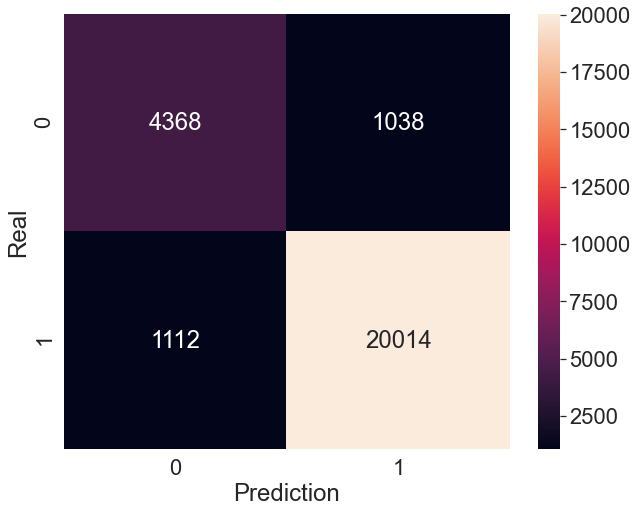

In [115]:
confusion_matrix_description(dt_confusion_matrix)

In [116]:
preprocessor = ColumnTransformer([("Scaler", StandardScaler(), [10,11,12,13,14])], remainder='passthrough')
modelRandomTree = Pipeline([('Preprocessor',preprocessor), 
                          ('Classifier', RandomForestClassifier(n_estimators= 100))])
modelRandomTree.fit(train_x, train_y)
predictions = modelRandomTree.predict(test_x)
score = np.around(accuracy_score(test_y, predictions)*100,decimals=2)
print(f'Acurácia do Random Tree Classifier é: {score}%')

Acurácia do Random Tree Classifier é: 94.14%


In [117]:
dt_confusion_matrix = confusion_matrix(test_y, predictions)
dt_confusion_matrix

array([[ 4583,   823],
       [  731, 20395]], dtype=int64)

Verdadeiro Negativo(Diz que não é bot e não é): 4583, 84.78% do total
Falso positivo(Diz que é bot, mas não é): 823, 15.22% do total
Falso Negativo(Diz que não é bot, mas é ): 731, 3.46% do total
Verdadeiro Positivo(Diz que é bot e é ): 20395, 96.54% do total
MCC: 0.82


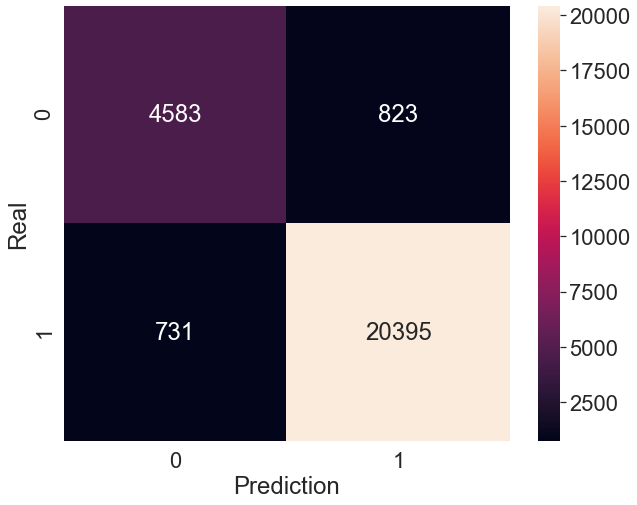

In [118]:
confusion_matrix_description(dt_confusion_matrix)

### StratifiedKFold

Para facilitar a visualização dos dados referentes ao cross validate mostraremos o intervalo de acurácia para os diferentes grupos de treino/teste e a acurácia média:

In [119]:
def cross_validation_description(results, model):
    std_dev = results['test_score'].std()
    mean = results['test_score'].mean()
    mean_p = np.around(mean *100, decimals=2)
    min_interval = np.around((mean - 2 * std_dev)*100,decimals = 2)
    max_interval = np.around((mean + 2 * std_dev) *100, decimals = 2)
    print(f'Intervalo de Acurácia do {model} é: [{min_interval}%, {max_interval}%] ')
    print(f'Média de Acurácia: {mean_p}%')

Quanto as parâmetros, temos que n_splits representa a quantidade de grupos(5 grupos) que serão criados e shuffle = True presenta que os dados serão embaralhados.

In [120]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)

##### Decision Tree

In [121]:
results = cross_validate(modelDecisionTree, x, y, cv = cv, return_train_score=False)
cross_validation_description(results,'Decision Tree')

Intervalo de Acurácia do Decision Tree é: [91.41%, 92.13%] 
Média de Acurácia: 91.77%


##### Random Forest

In [122]:
results = cross_validate(modelRandomTree, x, y, cv = cv, return_train_score=False)
cross_validation_description(results,'modelRandomTree')

Intervalo de Acurácia do modelRandomTree é: [93.83%, 94.68%] 
Média de Acurácia: 94.25%


### TSNE

Para visualizar a distruibuição da nossas classes no espaço, utilizaremos o algoritmos TSNE que, resumidamente, tranforma dados de muitas dimensões em dados com dimensões reduzidas mantendo o máximo de informação que for possível. 

<AxesSubplot:>

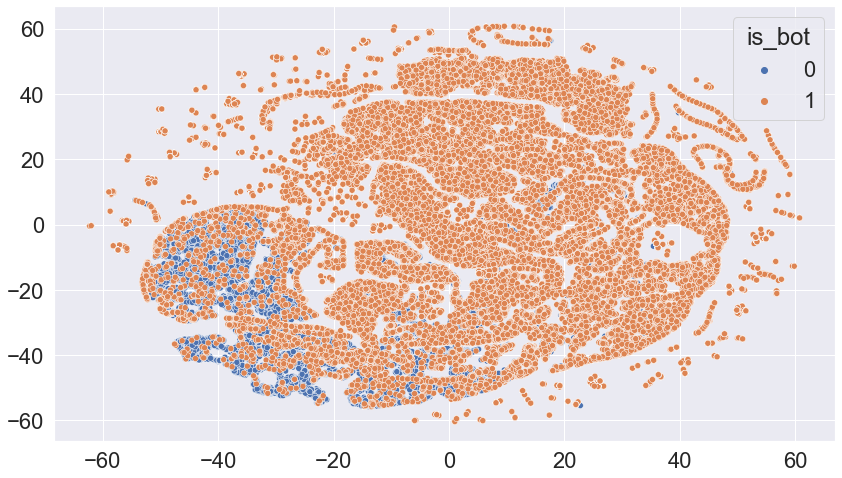

In [123]:
tsne = TSNE(n_components = 2)
tsne_dimensions = tsne.fit_transform(binary_matrix_train)
plt.figure(figsize=(14,8))
sns.scatterplot(x = tsne_dimensions[:,0] ,y = tsne_dimensions[:,1], hue = binary_matrix_train['is_bot'])

### Matriz de Correlação

In [124]:
del binary_matrix_train['is_protected']

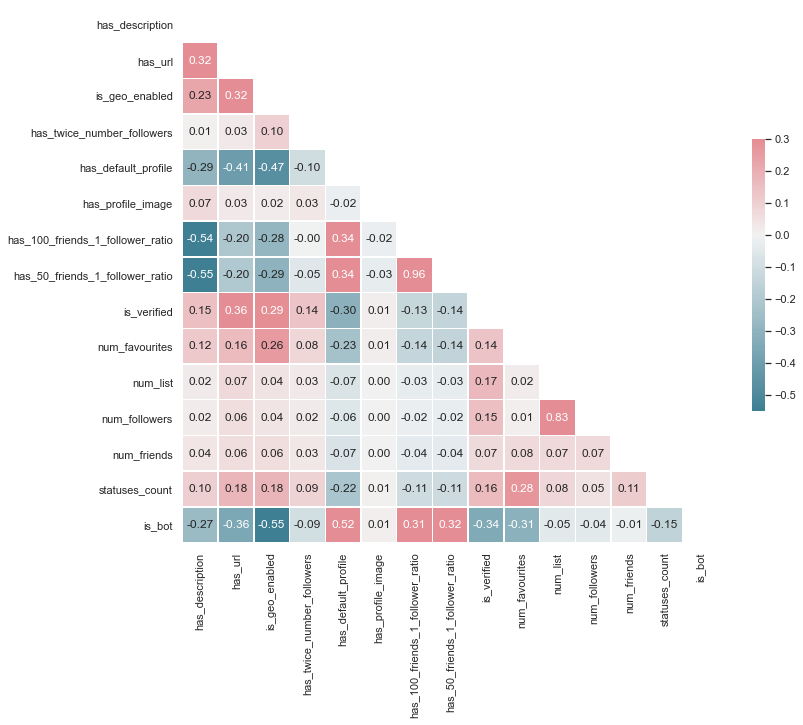

In [125]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(binary_matrix_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
matrix_corr = sns.heatmap(binary_matrix_train.corr(), mask=mask,annot=True, cmap=cmap,fmt='.2f', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [126]:
binary_matrix_train.corr()

,has_description,has_url,is_geo_enabled,has_twice_number_followers,has_default_profile,has_profile_image,has_100_friends_1_follower_ratio,has_50_friends_1_follower_ratio,is_verified,num_favourites,num_list,num_followers,num_friends,statuses_count,is_bot
has_description,1.000000,0.316887,0.225194,0.006635,-0.290456,0.072417,-0.543808,-0.548394,0.147208,0.124156,0.024304,0.019207,0.036431,0.103041,-0.269584
has_url,0.316887,1.000000,0.315726,0.026120,-0.406068,0.025404,-0.202468,-0.199656,0.358927,0.163748,0.074433,0.062979,0.061085,0.175508,-0.359209
is_geo_enabled,0.225194,0.315726,1.000000,0.099900,-0.474494,0.018940,-0.284425,-0.294419,0.290442,0.257234,0.042990,0.040325,0.058457,0.180946,-0.549095
has_twice_number_followers,0.006635,0.026120,0.099900,1.000000,-0.104019,0.033000,-0.004023,-0.053892,0.137933,0.083620,0.026957,0.022680,0.030655,0.089195,-0.094826
has_default_profile,-0.290456,-0.406068,-0.474494,-0.104019,1.000000,-0.021647,0.336163,0.344614,-0.304385,-0.232802,-0.067335,-0.057190,-0.068213,-0.215038,0.522027
has_profile_image,0.072417,0.025404,0.018940,0.033000,-0.021647,1.000000,-0.021121,-0.025510,0.012751,0.011749,0.002669,0.002327,0.002209,0.005245,0.011197
has_100_friends_1_follower_ratio,-0.543808,-0.202468,-0.284425,-0.004023,0.336163,-0.021121,1.000000,0.962563,-0.133076,-0.136309,-0.026035,-0.021663,-0.035690,-0.106515,0.307052
has_50_friends_1_follower_ratio,-0.548394,-0.199656,-0.294419,-0.053892,0.344614,-0.025510,0.962563,1.000000,-0.138251,-0.141252,-0.027045,-0.022505,-0.036680,-0.110508,0.320539
is_verified,0.147208,0.358927,0.290442,0.137933,-0.304385,0.012751,-0.133076,-0.138251,1.000000,0.137811,0.167741,0.146471,0.070830,0.162115,-0.341679
num_favourites,0.124156,0.163748,0.257234,0.083620,-0.232802,0.011749,-0.136309,-0.141252,0.137811,1.000000,0.019476,0.008342,0.076376,0.276014,-0.308941


In [ ]:
binary_matrix_train.is_verified.value_counts()

In [129]:
figure = matrix_corr.get_figure()    
figure.savefig('matriz_correlacao_experimento_1.png', bbox_inches = "tight")

### Experimento 1 utilizando os dados do Experimento 2 

In [130]:
experimento_2 = pd.read_csv("dataset_com_vizinhança_final_final.csv")

In [131]:
experimento_2.head()

,has_description,has_url,is_geo_enabled,has_twice_number_followers,has_default_profile,has_profile_image,has_100_friends_1_follower_ratio,has_50_friends_1_follower_ratio,is_protected,is_verified,num_favourites,num_list,num_followers,num_friends,statuses_count,followers_i_follow_back_ratio,friends_that_follow_me_back_ratio,is_bot
0,1,1,1,0,0,1,0,1,0,0,1,0,23,1360,29,0.347826,0.005882,1
1,0,0,1,0,0,1,0,0,0,0,138,0,234,1970,1408,0.790598,0.093909,1
2,1,1,0,0,0,1,0,0,0,0,8,0,77,1949,39,0.870130,0.034377,1
3,0,0,0,0,1,1,0,0,0,0,4,0,23,251,59,0.260870,0.023904,1
4,1,1,1,0,0,1,0,0,0,0,61,1,79,834,987,0.392405,0.037170,1


In [140]:
x = experimento_2.iloc[:, 0:15]

In [136]:
y = experimento_2['is_bot']

In [137]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: is_bot, dtype: int64

In [142]:
predictions = modelRandomTree.predict(x)
score = np.around(accuracy_score(y, predictions)*100,decimals=2)
print(f'Acurácia do Random Tree Classifier do Experimento 1 no dataset do experimento 2 é: {score}%')

Acurácia do Random Tree Classifier do Experimento 1 no dataset do experimento 2 é: 83.47%


In [144]:
dt_confusion_matrix = confusion_matrix(y, predictions)
dt_confusion_matrix

array([[1104,  846],
       [  30, 3321]], dtype=int64)

Verdadeiro Negativo(Diz que não é bot e não é): 1104, 56.62% do total
Falso positivo(Diz que é bot, mas não é): 846, 43.38% do total
Falso Negativo(Diz que não é bot, mas é ): 30, 0.9% do total
Verdadeiro Positivo(Diz que é bot e é ): 3321, 99.1% do total
MCC: 0.66


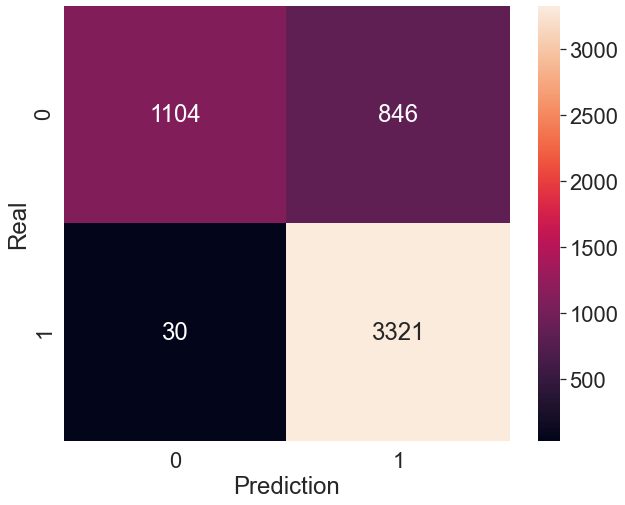

In [148]:
confusion_matrix_description(dt_confusion_matrix)